## Imports

In [2]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import os

#from eda import * # A MODIFIER CAR PAS PEP8 ET YA DES TRUCS QUI MARCHENT PAS

from numpy import radians, cos, sin, sqrt
from numpy import arcsin as asin

# Folium
#!pip install folium
import folium
from folium.plugins import HeatMap

# Dates
import datetime as dt
from datetime import timedelta

# KNN imputer
from sklearn.impute import KNNImputer

# Outliers
from sklearn.ensemble import IsolationForest

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

# PCA
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
#!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

In [3]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [4]:
# si google colab :
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# Load datasets
df_customers = pd.read_csv(os.path.join(path, 'data/olist_customers_dataset.csv'))
df_geolocation = pd.read_csv(os.path.join(path, 'data/olist_geolocation_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(path, 'data/olist_order_items_dataset.csv'))
df_order_payments = pd.read_csv(os.path.join(path, 'data/olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(os.path.join(path, 'data/olist_order_reviews_dataset.csv'))
df_orders = pd.read_csv(os.path.join(path, 'data/olist_orders_dataset.csv'))
df_products = pd.read_csv(os.path.join(path, 'data/olist_products_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(path, 'data/olist_sellers_dataset.csv'))
df_product_category = pd.read_csv(os.path.join(path, 'data/product_category_name_translation.csv'))

## Exploration de chaque dataset

### 1 - Customers dataset

In [6]:
# This dataset has information about the customer and its location. Use it to identify unique customers in the
# orders dataset and to find the orders delivery location.

# same customer will get different ids for different orders

In [7]:
df_customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [8]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# customer_id -> key to the orders dataset
# customer_unique_id -> unique identifier of a customer
# customer_zip_code_prefix -> 5 digits customer zop code
# customer_city -> customer city name
# customer_state -> customer state

In [10]:
df_customers['customer_zip_code_prefix'].nunique()

14994

Text(0, 0.5, 'Nombre de clients')

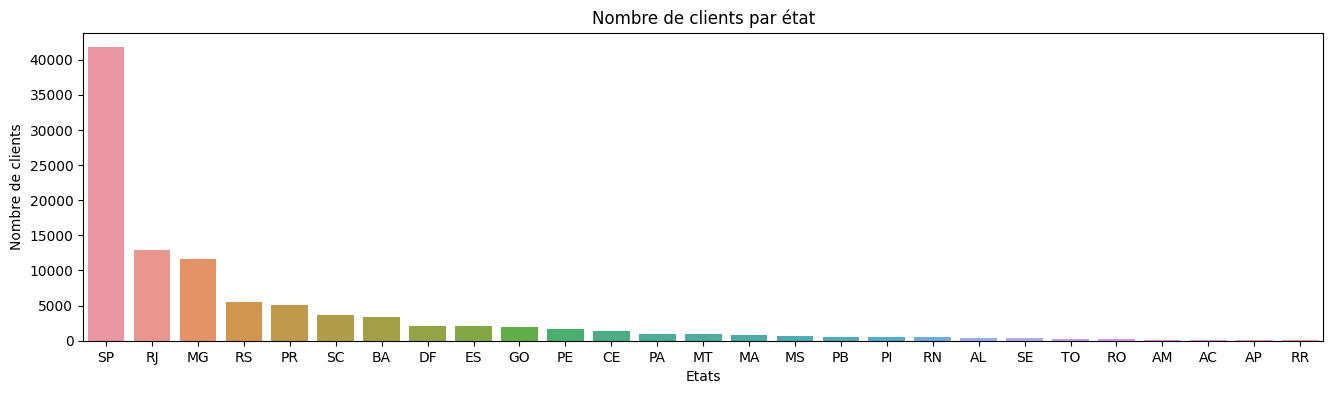

In [11]:
# Visualisation du nombre de clients par état

plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par état')
sns.barplot(y = df_customers['customer_state'].value_counts(),
            x = df_customers['customer_state'].value_counts().index)
plt.xlabel('Etats')
plt.ylabel('Nombre de clients')

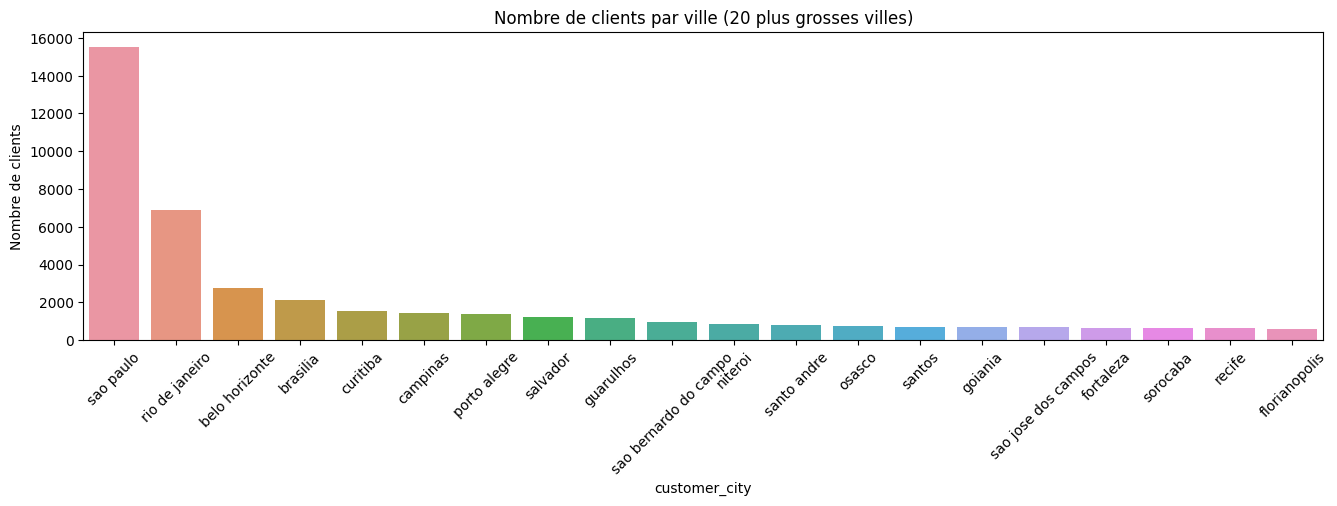

In [12]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par ville (20 plus grosses villes)')
sns.barplot(x = df_customers['customer_city'].value_counts().index[:20],
            y = df_customers['customer_city'].value_counts()[:20])
plt.ylabel('Nombre de clients')
plt.xticks(rotation = 45)
plt.show()

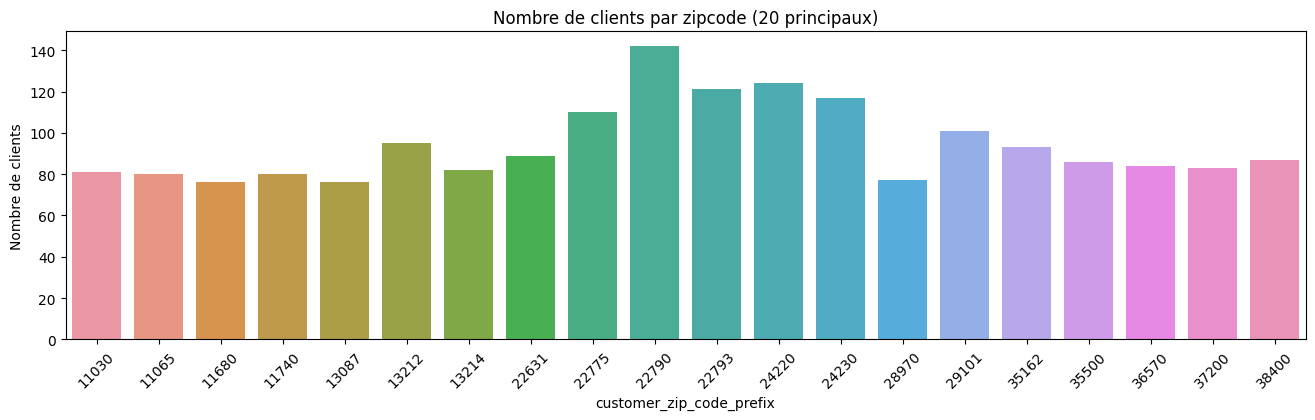

In [13]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par zipcode (20 principaux)')
sns.barplot(x = df_customers['customer_zip_code_prefix'].value_counts().index[:20],
            y = df_customers['customer_zip_code_prefix'].value_counts()[:20])
plt.ylabel('Nombre de clients')
plt.xticks(rotation = 45)
plt.show()

In [14]:
# majorité des clients à SP (São Paulo)

# faire un encodage du type : SP -> 0, les autres villes -> 1 ?

### 2 - Geolocation dataset

In [15]:
# This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find
# distances between sellers and customers

# -> Données géographiques

In [16]:
# Aperçu des données
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037        -23.54562        -46.63929   
1                         1046        -23.54608        -46.64482   
2                         1046        -23.54613        -46.64295   
3                         1041        -23.54439        -46.63950   
4                         1035        -23.54158        -46.64161   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [17]:
# -> faire moyenne ou barycentre pour avoir un ensemble de coordonnées par ville/code/etat

In [18]:
# Structure des données
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
########## Visualisation des données - Carte Folium ##########

# Map folium
brazil_coordinates = (-14.2400732, -53.1805017) # coordonnées prises sur wikipedia

# Generating the data that will be given to the heatmap
heat_data = [[row["geolocation_lat"], row["geolocation_lng"]] for index, row in df_geolocation.iterrows()]

# Creating the base map
base_map = folium.Map(location = brazil_coordinates, zoom_start = 2)

# Adding the heatmap layer
HeatMap(data = heat_data, radius = 8, max_zoom = 13).add_to(base_map)

# Displaying the map
# base_map

In [20]:
# -> attention, quelques outliers - la plupart des points sont au Brésil mais certains sont dans d'autres pays.

In [21]:
########## OUTLIERS ##########

# -> supprimer outliers pour ne garder que les points situés au Brésil

# Nord (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.27438888] # lat max du Brésil au Nord
# Sud (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.75116944] # lat min du Brésil au Sud

# Ouest (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.98283055] # long max du Brésil à l'Ouest
# Est (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.79314722] # long max du Brésil à l'Est

In [22]:
# Nombre de régions, villes, codes postaux représenté(e)s dans le jeu de données :
state_unique = df_geolocation['geolocation_state'].nunique()
city_unique = df_geolocation['geolocation_city'].nunique()
zip_unique = df_geolocation['geolocation_zip_code_prefix'].nunique()

print(f'Nombre de régions : {state_unique}')
print(f'Nombre de villes : {city_unique}')
print(f'Nombre de zip code : {zip_unique}')

Nombre de régions : 27
Nombre de villes : 8006
Nombre de zip code : 19010


In [23]:
# Principaux états :
df_geolocation['geolocation_state'].value_counts()[:5]

geolocation_state
SP    404267
MG    126334
RJ    121164
RS     61847
PR     57856
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

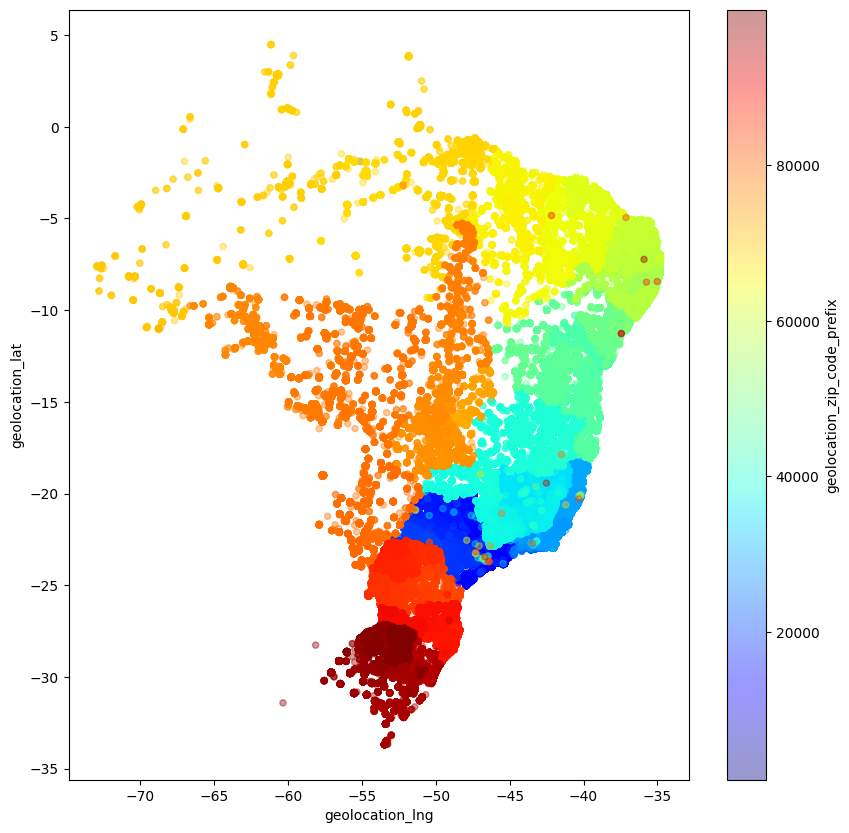

In [24]:
# Visualisation graphique des données géo (latitudes et longitudes) en fonction du code postal associé :

plt.figure()
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    c = 'geolocation_zip_code_prefix',
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (10, 10))
plt.show()

In [25]:
# quelques points qui ont le mauvais zipcode par rapport aux coordonnées...
# to do -> essayer de les supprimée ? ou des les rectifier ?

# encore quelques points un peu éloignés au Nord -> vérifier coordonnées du Brésil
# - update -> c'est bon, les points au Nord sont bien situés au Brésil - état du Nord semble donc moins réprésenté dans les données

In [26]:
########## DUPLICATS ##########

# nombre de duplicats dans le jeu de données
print(f'Nombre de duplicats dans le jeu de données geolocation avant processing: {df_geolocation.duplicated().sum()}')

# supprimer duplicats
print('****** Suppression des duplicats en cours ******')
df_geolocation = df_geolocation.drop_duplicates()

# nombre de duplicats dans le jeu de données après processing
print(f'Nombre de duplicats dans le jeu de données geolocation après processing: {df_geolocation.duplicated().sum()}')

Nombre de duplicats dans le jeu de données geolocation avant processing: 261822
****** Suppression des duplicats en cours ******
Nombre de duplicats dans le jeu de données geolocation après processing: 0


In [27]:
df_geolocation

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037        -23.54562        -46.63929   
1                               1046        -23.54608        -46.64482   
2                               1046        -23.54613        -46.64295   
3                               1041        -23.54439        -46.63950   
4                               1035        -23.54158        -46.64161   
...                              ...              ...              ...   
1000155                        99965        -28.18066        -52.03437   
1000156                        99950        -28.07219        -52.01127   
1000157                        99950        -28.06886        -52.01296   
1000158                        99950        -28.06864        -52.01071   
1000161                        99980        -28.38893        -51.84687   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000155       agua santa                RS  
1000156         tapejara                RS  
1000157         tapejara                RS  
1000158         tapejara                RS  
1000161  david canabarro                RS  

[738299 rows x 5 columns]

In [28]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'agua santa']

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
999754                         99965        -28.17389        -52.03845   
999755                         99965        -28.17843        -52.03526   
999933                         99965        -28.21084        -52.05993   
999949                         99965        -28.18171        -52.03559   
1000067                        99965        -28.17470        -52.03551   
1000155                        99965        -28.18066        -52.03437   

        geolocation_city geolocation_state  
999754        agua santa                RS  
999755        agua santa                RS  
999933        agua santa                RS  
999949        agua santa                RS  
1000067       agua santa                RS  
1000155       agua santa                RS

In [29]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'sao paulo']

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              1037        -23.54562        -46.63929   
1                              1046        -23.54608        -46.64482   
2                              1046        -23.54613        -46.64295   
3                              1041        -23.54439        -46.63950   
4                              1035        -23.54158        -46.64161   
...                             ...              ...              ...   
207050                         8450        -23.54767        -46.39002   
207052                         8450        -23.54707        -46.39109   
207053                         8473        -23.57269        -46.39424   
207054                         8411        -23.55594        -46.41391   
232549                         9540        -23.62693        -46.57277   

       geolocation_city geolocation_state  
0             sao paulo                SP  
1             sao paulo                SP  
2             sao paulo                SP  
3             sao paulo                SP  
4             sao paulo                SP  
...                 ...               ...  
207050        sao paulo                SP  
207052        sao paulo                SP  
207053        sao paulo                SP  
207054        sao paulo                SP  
232549        sao paulo                SP  

[79927 rows x 5 columns]

In [30]:
# plusieurs zip code par ville, mais une seule ville par zipcode

In [31]:
# attention -> plusieurs orthographes pour les villes
df_geolocation['geolocation_city'].value_counts()

geolocation_city
sao paulo            79927
rio de janeiro       35177
são paulo            19718
belo horizonte       19474
curitiba             11263
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
vertente do lerio        1
araçagi                  1
Name: count, Length: 8006, dtype: int64

In [32]:
# exemple: sao paulo & são paulo
# supprimer les accents pour être tranquille :

df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
df_geolocation['geolocation_city'].value_counts()

geolocation_city
sao paulo         99646
rio de janeiro    35177
belo horizonte    19474
curitiba          11263
brasilia           8791
                  ...  
paqueta               1
tabai                 1
martinesia            1
tapuirama             1
silvano               1
Name: count, Length: 5964, dtype: int64

In [33]:
# regarder nombre de zip code par ville et nb de villes par états (genre de heatmap avec cercles)

# MOCHE - A REFAIRE et surtout très long
"""
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    s = df_geolocation['geolocation_zip_code_prefix'],
                    label = 'geolocation_zip_code_prefix',
                    #c = df_geolocation['geolocation_city'],
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (12, 8))
plt.show()"""

"\ndf_geolocation.plot(kind = 'scatter',\n                    x = 'geolocation_lng',\n                    y = 'geolocation_lat',\n                    alpha = 0.4,\n                    s = df_geolocation['geolocation_zip_code_prefix'],\n                    label = 'geolocation_zip_code_prefix',\n                    #c = df_geolocation['geolocation_city'],\n                    cmap = plt.get_cmap('jet'),\n                    colorbar = True,\n                    figsize = (12, 8))\nplt.show()"

In [34]:
# Granularité du jeu de données : state > city > zip code

In [35]:
df_geolocation.loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                            1037        -23.54562        -46.63929   
14                           1037        -23.54519        -46.63786   
31                           1037        -23.54670        -46.64034   
169                          1037        -23.54388        -46.63807   
178                          1037        -23.54616        -46.63989   
236                          1037        -23.54388        -46.63807   
283                          1037        -23.54520        -46.63792   
417                          1037        -23.54519        -46.63786   
420                          1037        -23.54672        -46.64028   
433                          1037        -23.54646        -46.64015   
533                          1037        -23.54581        -46.63960   
677                          1037        -23.54587        -46.63969   
700                          1037        -23.54434        -46.63835   
724                          1037        -23.54314        -46.63761   
781                          1037        -23.54314        -46.63761   
874                          1037        -23.54493        -46.63829   
956                          1037        -23.54609        -46.63976   
1017                         1037        -23.54670        -46.64034   
1216                         1037        -23.54634        -46.63996   

     geolocation_city geolocation_state  
0           sao paulo                SP  
14          sao paulo                SP  
31          sao paulo                SP  
169         sao paulo                SP  
178         sao paulo                SP  
236         sao paulo                SP  
283         sao paulo                SP  
417         sao paulo                SP  
420         sao paulo                SP  
433         sao paulo                SP  
533         sao paulo                SP  
677         sao paulo                SP  
700         sao paulo                SP  
724         sao paulo                SP  
781         sao paulo                SP  
874         sao paulo                SP  
956         sao paulo                SP  
1017        sao paulo                SP  
1216        sao paulo                SP

In [36]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -23.54562
14     -23.54519
31     -23.54670
169    -23.54388
178    -23.54616
236    -23.54388
283    -23.54520
417    -23.54519
420    -23.54672
433    -23.54646
533    -23.54581
677    -23.54587
700    -23.54434
724    -23.54314
781    -23.54314
874    -23.54493
956    -23.54609
1017   -23.54670
1216   -23.54634
Name: geolocation_lat, dtype: float64

In [37]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-23.54533514931352

In [38]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -46.63929
14     -46.63786
31     -46.64034
169    -46.63807
178    -46.63989
236    -46.63807
283    -46.63792
417    -46.63786
420    -46.64028
433    -46.64015
533    -46.63960
677    -46.63969
700    -46.63835
724    -46.63761
781    -46.63761
874    -46.63829
956    -46.63976
1017   -46.64034
1216   -46.63996
Name: geolocation_lng, dtype: float64

In [39]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-46.63899521271492

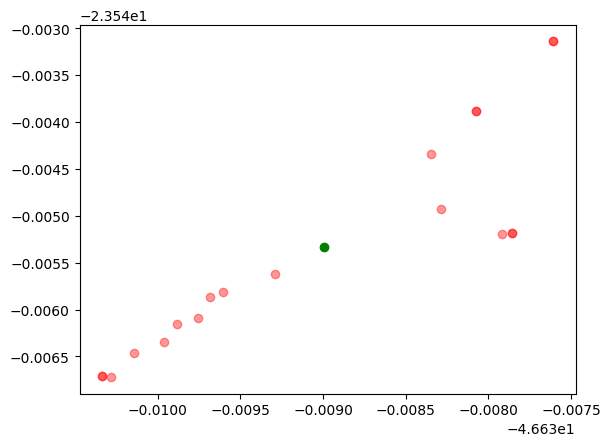

In [40]:
# test en remplaçant coordonnées par moyenne
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

# Visualisation graphique des zip_code_prefix, des latitudes et longitudes associées
plt.figure()
plt.scatter(x = x_zip, y = y_zip, alpha = 0.4, c = 'red') # points
plt.scatter(x = x_zip.mean(), y = y_zip.mean(), c = 'green') # moyenne
plt.show()

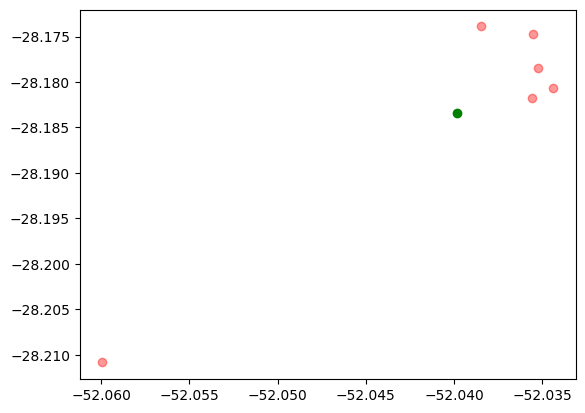

In [41]:
# test avec un autre zip code
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]

plt.figure()
plt.scatter(x = x_zip,
            y = y_zip,
            alpha = 0.4,
            c = 'red')
plt.scatter(x = x_zip.mean(),
            y = y_zip.mean(),
            c = 'green')
plt.show()

In [42]:
# impossible de merger geoloc aux autres df (sellers et customers) car plusieurs coordonnées par zip code/villes...
# pas la même granularité entre les df donc besoin de merger

In [43]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [44]:
# groupby et remplacer par mean
df_geo = df_geolocation.groupby(['geolocation_zip_code_prefix'], as_index = False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first',
    'geolocation_state' :'first'
})

<Figure size 640x480 with 0 Axes>

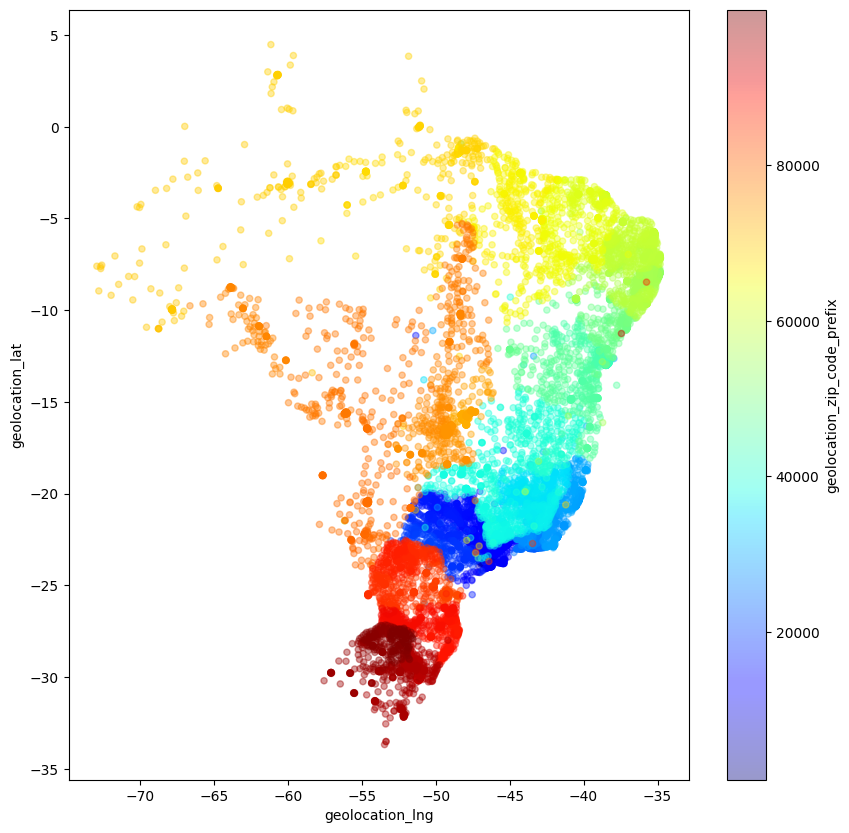

In [45]:
plt.figure()
df_geo.plot(kind = 'scatter',
            x = 'geolocation_lng',
            y = 'geolocation_lat',
            alpha = 0.4,
            c = 'geolocation_zip_code_prefix',
            cmap = plt.get_cmap('jet'),
            colorbar = True,
            figsize = (10, 10))
plt.show()

### 3 - Order items dataset

In [46]:
# This dataset includes data about the items purchased within each order.

df_order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [47]:
# order_id -> order unique id
# order_item_id -> nb of items by order
# product_id -> product unique id
# seller_id -> seller unique id
# shipping_limit_date -> shipping limit date (for the seller)
# price -> item price
# freight_value -> item freight value (si plusieurs items par commande, freight value splitté entre les items)

In [48]:
df_order_items['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

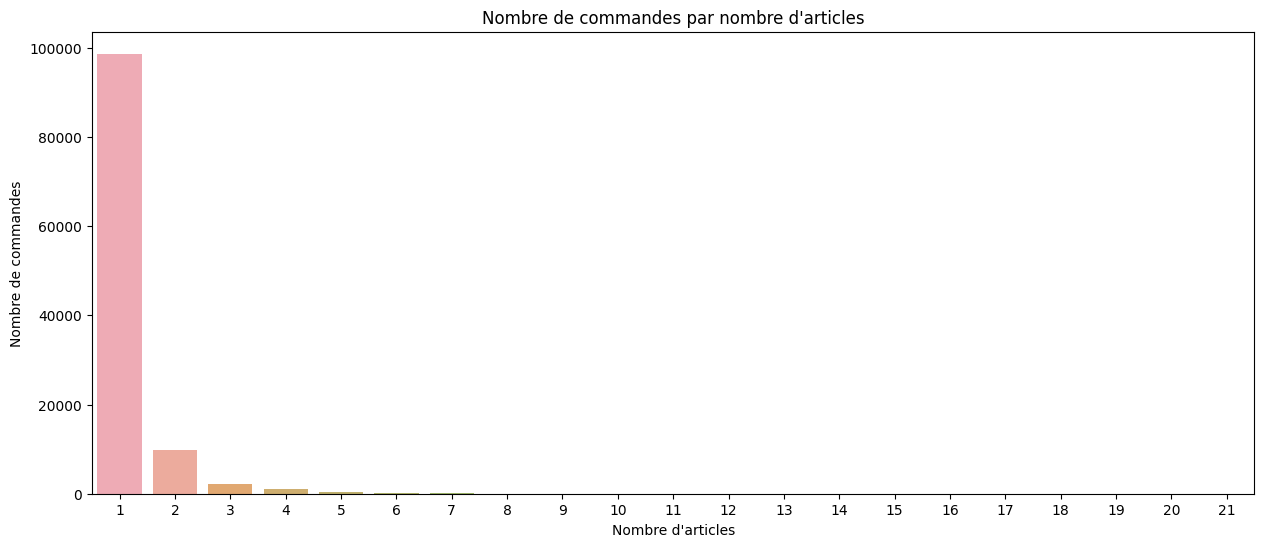

In [49]:
# Nombre d'articles par commande
plt.figure(figsize = (15, 6))
sns.barplot(y = df_order_items['order_item_id'].value_counts(),
            x = df_order_items['order_item_id'].value_counts().index,
            alpha = 0.8)
plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
plt.show()

In [50]:
# la plupart des commandes -> 1 seul article

### 4 - Order payments dataset

In [51]:
# This dataset includes data about the orders payment options

# Aperçu des données
df_order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [52]:
# order_id -> unique ID of an order
# payment_sequential -> nb de méthodes de paiement
# payment_type -> méthode de paiement
# payment_installments -> nb of installments chosen by the customer (paiement en plusieurs fois)
# payment_value -> transaction value

In [53]:
df_order_payments['payment_sequential'].value_counts()[:5]

payment_sequential
1    99360
2     3039
3      581
4      278
5      170
Name: count, dtype: int64

In [54]:
# La majorité des paiements se fait en une fois

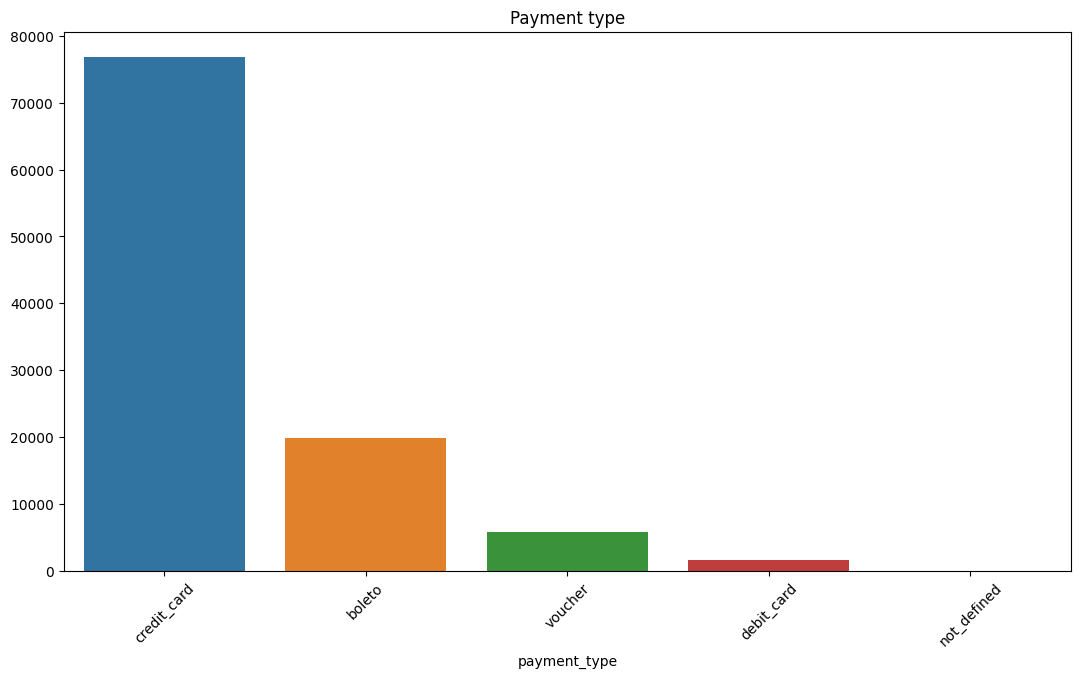

In [55]:
# Type de paiement
order_status = df_order_payments['payment_type'].value_counts()

plt.figure(figsize = (13, 7))
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Payment type')
plt.xticks(rotation = 45)
plt.show()

In [56]:
# 5 types de paiement différents
# Boleto = moyen de payment en espèce

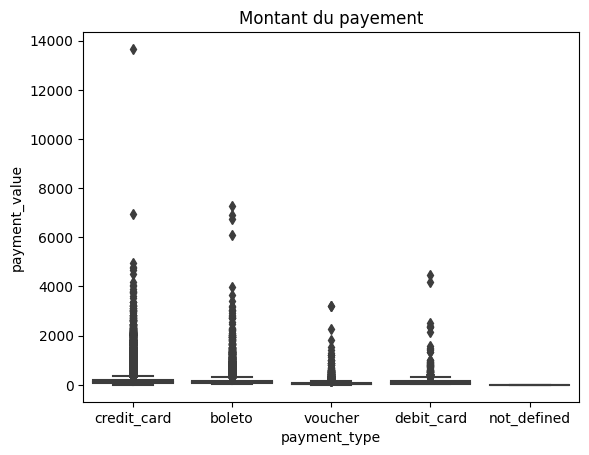

In [57]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type')
plt.title('Montant du payement')
plt.show()

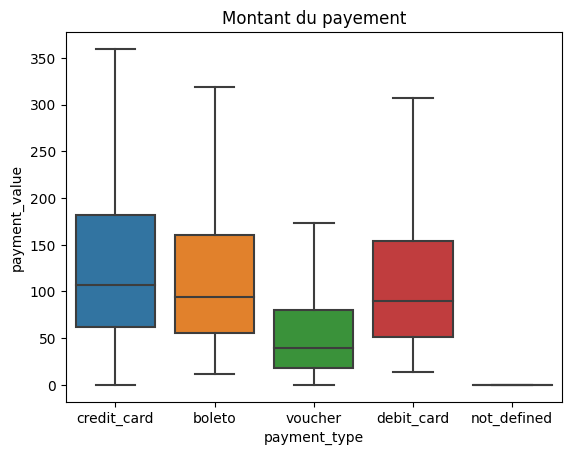

In [58]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type',
            showfliers = False) # pour enlever les outliers 
plt.title('Montant du payement')
plt.show()

In [59]:
# 'Not defined' -> 3 lignes

display(df_order_payments.loc[df_order_payments['payment_type'] == 'not_defined'])

# à dropper pour simplifier et nettoyer un peu les données
df_order_payments = df_order_payments.loc[df_order_payments['payment_type'] != 'not_defined']

order_id  payment_sequential payment_type  \
51280  4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411  00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
94427  c8c528189310eaa44a745b8d9d26908b                   1  not_defined   

       payment_installments  payment_value  
51280                     1            0.0  
57411                     1            0.0  
94427                     1            0.0

### 5 - Order reviews dataset

In [60]:
# This dataset includes data about the reviews made by the customers

# Aperçu des données
df_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [61]:
# review_id -> unique review id
# order_id -> unique order id
# review_score -> de 1 à 5
# review_comment_title -> titre du commentaire (en portugais)
# review_comment_message -> commentaire (en portugais)
# review_creation_date -> date à laquelle le questionnaire de satisfaction a été envoyé au client
# review_answer_timestamp -> date de complétion du questionnaire de satisfaction par le client

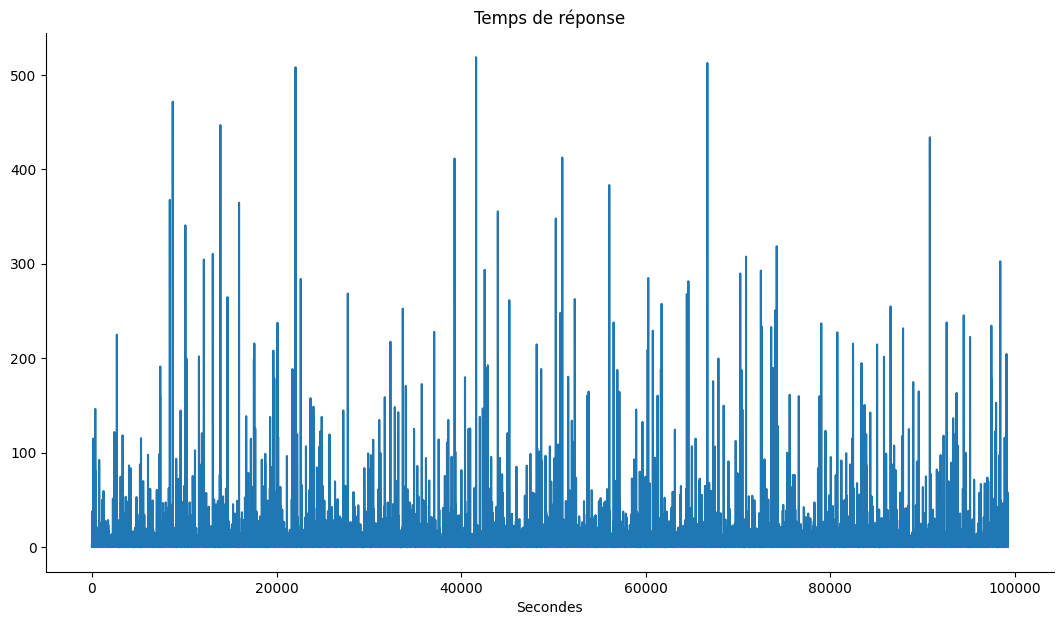

In [62]:
# délai d'évaluation des produits

delay_reponse = (pd.to_datetime(df_order_reviews['review_answer_timestamp']) - pd.to_datetime(df_order_reviews['review_creation_date'])).dt.total_seconds()/(3600*24)
delay_reponse

# Histogramme du délai d'évaluation des produits

plt.figure(figsize = (13, 7))
sns.lineplot(data = delay_reponse) # TO DO -> MOCHE, A ARRANGER
plt.xlabel('Secondes')
plt.title('Temps de réponse')
sns.despine()
plt.show()

In [63]:
# quelques commentaires manquants -> faire variable bool (commentaire présent/absent)
# (cf. section feature engineering plus bas)

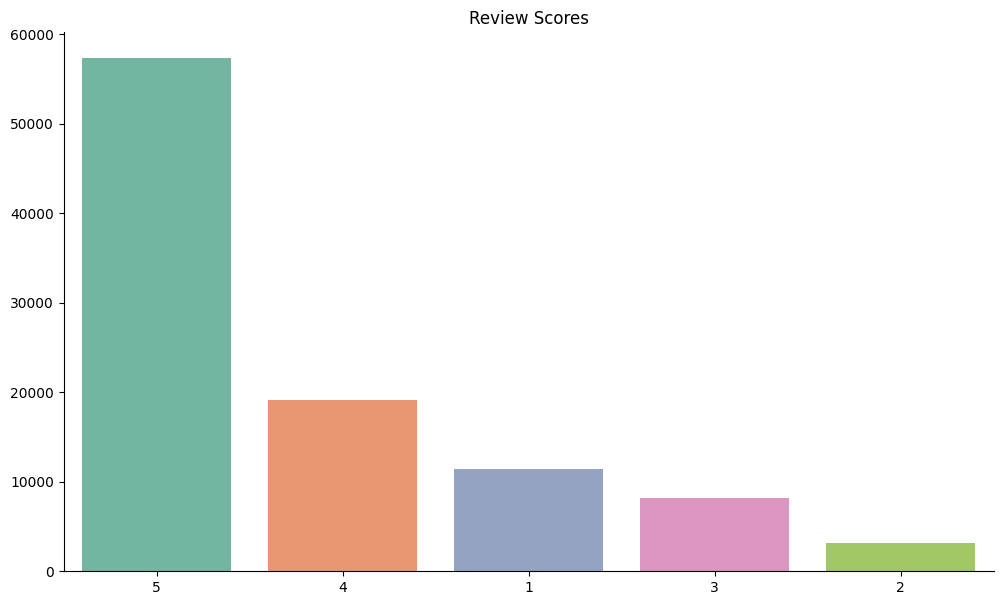

In [64]:
# Distribution des scores de reviews
plt.figure(figsize = (12, 7))
review_score_index = [str(i) for i in df_order_reviews['review_score'].value_counts().index]
sns.barplot(x = review_score_index, y = df_order_reviews['review_score'].value_counts().values, palette = 'Set2')
plt.title('Review Scores')
sns.despine() # Remove the top and right spines from plot(s)
plt.show()

### 6 - Orders dataset

In [65]:
# "Core" dataset

# Aperçu des données
df_orders.sample(5)

order_id                       customer_id  \
12762  1e48885ebbfefb5b48f97437f0104855  e150e46dae622d09f19b64a34f9387df   
19944  5098912c7ec347ac3b40a75fd288e440  9047078e540bb787e7b270d99d22bd13   
79654  f596454780aa1b19597e739fdae8c56c  a75c9c1d65a2a1df8d788369a668eeb2   
39072  76b4763b4e176f7859739182dcf5ff2f  d0412a3782a6a8bcc605dc421bf01f9b   
19799  6543c9fd7bfbf8a31d844a1523b6f04d  2b3c7bf966c44dd182d10a6de2b9c64f   

      order_status order_purchase_timestamp    order_approved_at  \
12762    delivered      2017-11-10 20:37:46  2017-11-10 20:50:39   
19944    delivered      2018-01-27 15:24:10  2018-01-27 15:33:21   
79654    delivered      2017-08-14 20:59:57  2017-08-14 21:15:18   
39072    delivered      2018-02-05 11:20:50  2018-02-05 11:30:31   
19799    delivered      2018-01-16 22:49:54  2018-01-16 22:55:29   

      order_delivered_carrier_date order_delivered_customer_date  \
12762          2017-11-14 19:41:23           2017-11-28 15:39:18   
19944          2018-01-29 20:32:29           2018-02-01 00:22:36   
79654          2017-08-18 18:05:20           2017-08-30 17:10:07   
39072          2018-02-06 19:49:03           2018-02-15 22:05:54   
19799          2018-01-18 18:04:22           2018-01-25 20:09:18   

      order_estimated_delivery_date  
12762           2017-12-05 00:00:00  
19944           2018-02-23 00:00:00  
79654           2017-09-05 00:00:00  
39072           2018-03-01 00:00:00  
19799           2018-02-07 00:00:00

In [66]:
# order_id -> unique id of the order
# customer_id -> key to the customer dataset
# order_status -> status de la commande
# order_purchase_timestamp -> date d'achat
# order_approved_at -> date d'acceptation du paiment
# order_delivered_carrier_date -> date à laquelle la commande confiée au service de livraison
# order_delivered_customer_date -> date de livraison
# order_estimated_delivery_date -> date de livraison estimée indiquée au client lors de l'achat

In [67]:
# idée -> regarder delta entre date de livraison estimée et effective - regarder correlation avec note review

In [68]:
# manque quelques dates - regarder où

df_orders.loc[df_orders['order_delivered_customer_date'].isna()]

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6         invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44         shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103       invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154        shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
...            ...                      ...                  ...   
99283     canceled      2018-08-31 16:13:44                  NaN   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaN                           NaN   
44             2018-06-05 14:32:00                           NaN   
103                            NaN                           NaN   
128                            NaN                           NaN   
154            2018-01-11 19:39:23                           NaN   
...                            ...                           ...   
99283                          NaN                           NaN   
99313                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
6               2017-05-09 00:00:00  
44              2018-06-28 00:00:00  
103             2018-08-21 00:00:00  
128             2017-10-03 00:00:00  
154             2018-02-07 00:00:00  
...                             ...  
99283           2018-10-01 00:00:00  
99313           2018-02-06 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[2965 rows x 8 columns]

In [69]:
# to do -> voir s'il y a un lien entre ces commandes

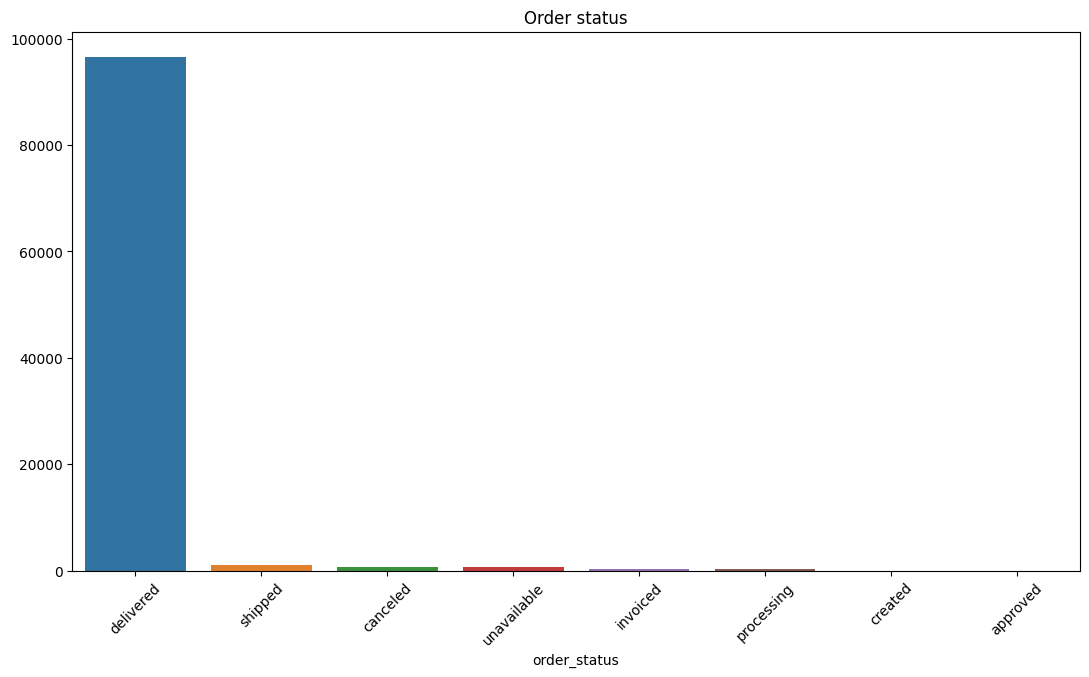

In [70]:
# Nombre de commandes par statuts d'achats
order_status = df_orders['order_status'].value_counts()

# Barplot
plt.figure(figsize = (13, 7))
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Order status')
plt.xticks(rotation = 45)
plt.show()

In [71]:
# Suppression des commandes 'canceled' ? ou les concerver ?
df_orders = df_orders[df_orders['order_status'] != 'canceled']

# enlever aussi commandes 'created' ?
# autre idée -> ne garder que les commandes livrées ?

### 7 - Products dataset

In [72]:
# This dataset includes data about the products sold by Olist

# Aperçu des données
df_products.sample(5)

product_id product_category_name  \
13280  c950e249236ca11aa3353e291793a3e1          beleza_saude   
1746   2e8eb076261eb842a7e1bdf64e1facda      fashion_calcados   
6793   ca00f42e51fa8b6226d4c57ef6557967    relogios_presentes   
31148  13d9c868a0780a698f5604b49d3e81ca             papelaria   
28754  124a1ea6bfa9ccc5f53e067ff9b2ef25    relogios_presentes   

       product_name_lenght  product_description_lenght  product_photos_qty  \
13280                 54.0                      3452.0                 1.0   
1746                  53.0                       408.0                 3.0   
6793                  56.0                       640.0                 2.0   
31148                 56.0                       451.0                 1.0   
28754                 51.0                       317.0                 2.0   

       product_weight_g  product_length_cm  product_height_cm  \
13280             300.0               30.0               15.0   
1746             1400.0               22.0               12.0   
6793              350.0               19.0               13.0   
31148             450.0               20.0               11.0   
28754             833.0               17.0               16.0   

       product_width_cm  
13280              15.0  
1746               33.0  
6793               13.0  
31148              20.0  
28754              16.0

In [73]:
# product_id
# product_category_name (en portugais)
# product_name_lenght
# product_description_lenght
# product_photos_qty
# product_weight_g
# product_length_cm
# product_height_cm
# product_width_cm

In [74]:
# combien de catégories de produits ?
df_products['product_category_name'].value_counts() # -> 73 catégories de produits

product_category_name
cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              919
perfumaria                                         868
papelaria                                          849
fashion_bolsas_e_acessorios                        849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                

### 8 - Sellers dataset

In [75]:
# This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller
# location and to identify which seller fulfilled each product

# Aperçu des données
df_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [76]:
# seller_id
# seller_zip_code_prefix
# seller_city
# seller_state

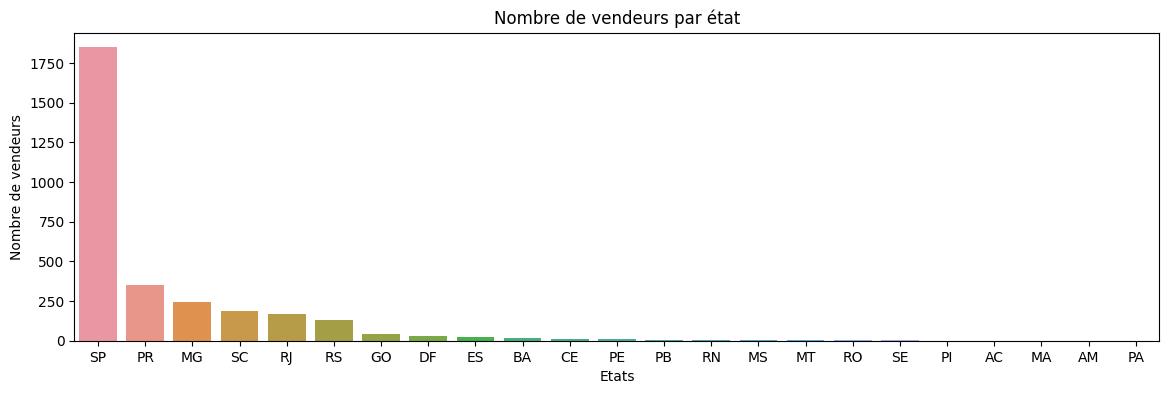

In [77]:
# Visualisation du nombre de vendeurs dans les différents états
plt.figure(figsize = (14, 4))
sns.barplot(y = df_sellers['seller_state'].value_counts(),
            x = df_sellers['seller_state'].value_counts().index)
plt.title('Nombre de vendeurs par état')
plt.xlabel('Etats')
plt.ylabel('Nombre de vendeurs')
plt.show()

In [78]:
# grande majorité des vendeurs sont à SP (São Paulo)

### 9 - Product category name translation

In [79]:
# Translates the product_category_name to english

# Aperçu des données
df_product_category.sample(5)

product_category_name   product_category_name_english
44      industria_comercio_e_negocios  industry_commerce_and_business
43  construcao_ferramentas_iluminacao       construction_tools_lights
54                   artigos_de_natal              christmas_supplies
28            fashion_roupa_masculina           fashion_male_clothing
33                   eletrodomesticos                 home_appliances

In [80]:
# Données manquantes
df_product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## Liens entre datasets

## Merge

In [81]:
# utiliser le dataset orders et merger les autres datasets dessus

# Datasets :
#df_customers
#df_geolocation
#df_order_items
#df_order_payments
#df_order_reviews
#df_orders
#df_products
#df_sellers
#df_product_category

In [82]:
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [83]:
df_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [84]:
# 1 - merge sellers avec coordonnées geo

# renommer colonnes df sellers pour faciliter merge
df_sellers.columns = ['seller_id', 'geolocation_zip_code_prefix', 'seller_city', 'seller_state']

# merge
df_sellers_geo = pd.merge(df_sellers,
                          df_geo,
                          how = 'left',
                          on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_sellers_geo.drop(columns = ['geolocation_zip_code_prefix',
                               'geolocation_city',
                               'geolocation_state'
                              ], inplace = True)

# renommer colonnes
df_sellers_geo.columns = ['seller_id', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng']

df_sellers_geo.sample(5)

seller_id         seller_city seller_state  \
920   dee656f0f566ed1aa85bd137c943f08f            cruzeiro           SP   
2522  1710c3aaa9c6b44ec3883ee0fe300e21  sao caetano do sul           SP   
1567  09bad886111255c5b5030314fc7f1a4a           sao paulo           SP   
613   f46490624488d3ff7ce78613913a7711           guarulhos           SP   
442   610f72e407cdd7caaa2f8167b0163fd8           sao paulo           SP   

      seller_geolocation_lat  seller_geolocation_lng  
920                -22.57848               -44.96178  
2522               -23.62390               -46.55274  
1567               -23.54478               -46.63206  
613                -23.44300               -46.50632  
442                -23.53609               -46.64977

In [85]:
# 2 - merge sellers avec order items

nb_sellers = df_sellers_geo['seller_id'].nunique()
print(f'Nombre de sellers avant merge : {nb_sellers}')

nb_sellers_items = df_order_items['seller_id'].nunique()
print(f'Nombre de sellers dans items avant merge : {nb_sellers_items}')

nb_order_items = df_order_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order_items}')

sellers_and_items = pd.merge(df_order_items,
                             df_sellers_geo,
                             how = 'left',
                             left_on = ['seller_id'],
                             right_on = ['seller_id'])

nb_sellers_final = sellers_and_items['seller_id'].nunique()
print(f'Nombre de sellers après merge : {nb_sellers_final}')
print(f'{nb_sellers - nb_sellers_final} sellers perdus pendant le merge.')
print(f'{nb_sellers_items - nb_sellers_final} sellers items perdus pendant le merge.')

nb_order_final = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order_items - nb_order_final} order perdus pendant le merge.')

sellers_and_items

Nombre de sellers avant merge : 3095
Nombre de sellers dans items avant merge : 3095
Nombre de commandes dans items avant merge : 98666
Nombre de sellers après merge : 3095
0 sellers perdus pendant le merge.
0 sellers items perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value    seller_city  \
0       2017-09-19 09:45:35   58.90          13.29  volta redonda   
1       2017-05-03 11:05:13  239.90          19.93      sao paulo   
2       2018-01-18 14:48:30  199.00          17.87  borda da mata   
3       2018-08-15 10:10:18   12.99          12.79         franca   
4       2017-02-13 13:57:51  199.90          18.14         loanda   
...                     ...     ...            ...            ...   
112645  2018-05-02 04:11:01  299.99          43.41         itajai   
112646  2018-07-20 04:31:48  350.00          36.53      sao paulo   
112647  2017-10-30 17:14:25   99.90          16.95       curitiba   
112648  2017-08-21 00:04:32   55.99           8.72      sao paulo   
112649  2018-06-12 17:10:13   43.00          12.79       ibitinga   

       seller_state  seller_geolocation_lat  seller_geolocation_lng  
0                SP               -22.49719               -44.12732  
1                SP               -23.56575               -46.51910  
2                MG               -22.26280               -46.17074  
3                SP               -20.55365               -47.38715  
4                PR               -22.92958               -53.13575  
...             ...                     ...                     ...  
112645           SC               -26.91251               -48.67409  
112646           SP               -23.53584               -46.64285  
112647           PR               -25.46956               -49.28818  
112648           SP               -23.63770               -46.69555  
112649           SP               -21.75723               -48.82954  

[112650 rows x 11 columns]

In [86]:
df_products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [87]:
# 3 - ajouter infos produits
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_and_items['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_produits_df = df_products['product_id'].nunique()
print(f'Nombre de produits dans df produit avant merge : {nb_produits_df}')

nb_order = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

sellers_items_products = pd.merge(sellers_and_items,
                                  df_products,
                                  how = 'left',
                                  left_on = ['product_id'],
                                  right_on = ['product_id'])

nb_produits_final = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')
print(f'{nb_produits_df - nb_produits_final} infos produits perdus pendant le merge.')

nb_order_final = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')

sellers_items_products

Nombre de produits dans order items avant merge : 32951
Nombre de produits dans df produit avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de produits après merge : 32951
0 produits perdus pendant le merge.
0 infos produits perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value    seller_city  \
0       2017-09-19 09:45:35   58.90          13.29  volta redonda   
1       2017-05-03 11:05:13  239.90          19.93      sao paulo   
2       2018-01-18 14:48:30  199.00          17.87  borda da mata   
3       2018-08-15 10:10:18   12.99          12.79         franca   
4       2017-02-13 13:57:51  199.90          18.14         loanda   
...                     ...     ...            ...            ...   
112645  2018-05-02 04:11:01  299.99          43.41         itajai   
112646  2018-07-20 04:31:48  350.00          36.53      sao paulo   
112647  2017-10-30 17:14:25   99.90          16.95       curitiba   
112648  2017-08-21 00:04:32   55.99           8.72      sao paulo   
112649  2018-06-12 17:10:13   43.00          12.79       ibitinga   

       seller_state  seller_geolocation_lat  seller_geolocation_lng  \
0                SP               -22.49719               -44.12732   
1                SP               -23.56575               -46.51910   
2                MG               -22.26280               -46.17074   
3                SP               -20.55365               -47.38715   
4                PR               -22.92958               -53.13575   
...             ...                     ...                     ...   
112645           SC               -26.91251               -48.67409   
112646           SP               -23.53584               -46.64285   
112647           PR               -25.46956               -49.28818   
112648           SP               -23.63770               -46.69555   
112649           SP               -21.75723               -48.82954   

         product_category_name  product_name_lenght  \
0                   cool_stuff                 58.0   
1                     pet_shop                 56.0   
2             moveis_decoracao                 59.0   
3                   perfumaria                 42.0   
4           ferramentas_jardim                 59.0   
...                        ...                  ...   
112645   utilidades_domesticas                 43.0   
112646  informatica_acessorios                 31.0   
112647           esporte_lazer                 43.0   
112648  informatica_acessorios                 56.0   
112649         cama_mesa_banho                 47.0   

        product_description_lenght  product

In [88]:
# 4 - ajouter infos produits aux commandes
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_order = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

nb_order_df = df_orders['order_id'].nunique()
print(f'Nombre de commandes avant merge : {nb_order_df}')

products_orders = pd.merge(df_orders,
                           sellers_items_products,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_produits_final = products_orders['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')

nb_order_final = products_orders['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order items perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order perdus pendant le merge.')

products_orders

Nombre de produits dans order items avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de commandes avant merge : 98816


Nombre de produits après merge : 32735
216 produits perdus pendant le merge.
Nombre de commandes après merge : 98816
-150 order items perdus pendant le merge.
0 order perdus pendant le merge.


order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112714  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112715  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112716  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112717  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112718  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
112714    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
112715    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
112716    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112717    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112718    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112714          2018-02-07 23:22:42           2018-02-28 17:37:56   
112715          2017-08-28 20:52:26           2017-09-21 11:24:17   
112716          2018-01-12 15:35:03           2018-01-25 23:32:54   
112717          2018-01-12 15:35:03           2018-01-25 23:32:54   
112718          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2018-08-13 00:00:00            1.0   
2                2018-09-04 00:00:00            1.0   
3                2017-12-15 00:00:00            1.0   
4                2018-02-26 00:00:00            1.0   
...                              ...            ...   
112714           2018-03-02 00:00:00            1.0   
112715           2017-09-27 00:00:00            1.0   
112716           2018-02-15 00:00:00            1.0   
112717           2018-02-15 00:00:00            2.0   
112718           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
112714  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
112715  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
112716  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [89]:
# 5 - ajouter infos payment aux commandes
# merge précédent (products_orders) + df_order_payments

nb_order = products_orders['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_payments['order_id'].nunique()
print(f'Nombre de payments commandes avant merge : {nb_order_df}')

products_orders_payment = pd.merge(products_orders,
                           df_order_payments,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order payments perdus pendant le merge.')

products_orders_payment

Nombre de commandes dans order avant merge : 98816
Nombre de payments commandes avant merge : 99437
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
621 order payments perdus pendant le merge.


order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117684  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117685  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117686  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117687  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117688  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
117684    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
117685    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
117686    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117687    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117688    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117684          2018-02-07 23:22:42           2018-02-28 17:37:56   
117685          2017-08-28 20:52:26           2017-09-21 11:24:17   
117686          2018-01-12 15:35:03           2018-01-25 23:32:54   
117687          2018-01-12 15:35:03           2018-01-25 23:32:54   
117688          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2017-10-18 00:00:00            1.0   
2                2017-10-18 00:00:00            1.0   
3                2018-08-13 00:00:00            1.0   
4                2018-09-04 00:00:00            1.0   
...                              ...            ...   
117684           2018-03-02 00:00:00            1.0   
117685           2017-09-27 00:00:00            1.0   
117686           2018-02-15 00:00:00            1.0   
117687           2018-02-15 00:00:00            2.0   
117688           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
...                                  ...                               ...   
117684  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
117685  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
117686  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [90]:
# 6 - ajouter infos reviews aux commandes
# merge précédent (products_orders_payment) + df_order_reviews

nb_order = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_reviews['order_id'].nunique()
print(f'Nombre de reviews commandes avant merge : {nb_order_df}')

products_orders_payment_reviews = pd.merge(products_orders_payment,
                           df_order_reviews,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order reviews perdus pendant le merge.')

products_orders_payment_reviews

Nombre de commandes dans order avant merge : 98816


Nombre de reviews commandes avant merge : 98673
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
-143 order reviews perdus pendant le merge.


order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
118388  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
118389  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
118390  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
118391  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
118392  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
118388    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
118389    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
118390    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
118391    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
118392    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
118388          2018-02-07 23:22:42           2018-02-28 17:37:56   
118389          2017-08-28 20:52:26           2017-09-21 11:24:17   
118390          2018-01-12 15:35:03           2018-01-25 23:32:54   
118391          2018-01-12 15:35:03           2018-01-25 23:32:54   
118392          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2017-10-18 00:00:00            1.0   
2                2017-10-18 00:00:00            1.0   
3                2018-08-13 00:00:00            1.0   
4                2018-09-04 00:00:00            1.0   
...                              ...            ...   
118388           2018-03-02 00:00:00            1.0   
118389           2017-09-27 00:00:00            1.0   
118390           2018-02-15 00:00:00            1.0   
118391           2018-02-15 00:00:00            2.0   
118392           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
...                                  ...                               ...   
118388  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
118389  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
118390  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [91]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [92]:
df_geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [93]:
df_customers.columns = [
    'customer_id', 
    'customer_unique_id', 
    'geolocation_zip_code_prefix',
    'customer_city', 
    'customer_state'
    ]

In [94]:
# 7 - customer + geo
df_customers_geo = pd.merge(df_customers, 
                            df_geo, 
                            how = 'left', 
                            on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_customers_geo.drop(columns = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], 
                      inplace = True)
df_customers_geo

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

               customer_city customer_state  geolocation_lat  geolocation_lng  
0                     franca             SP        -20.49927        -47.39666  
1      sao bernardo do campo             SP        -23.72840        -46.54225  
2                  sao paulo             SP        -23.53131        -46.65669  
3            mogi das cruzes             SP        -23.50067        -46.18635  
4                   campinas             SP        -22.97571        -47.14314  
...                      ...            ...              ...              ...  
99436              sao paulo             SP        -23.58618        -46.49965  
99437        taboao da serra             SP        -23.61679        -46.76772  
99438              fortaleza             CE         -3.73563        -38.51078  
99439                 canoas             RS        -29.94996        -51.16838  
99440                  cotia             SP        -23.59665        -46.91177  

[99441 rows x 6 columns]

In [95]:
df_customers_geo.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [96]:
# renommer colonnes avant prochain merge
df_customers_geo.columns = [
    'customer_id', 
    'customer_unique_id', 
    'customer_city', 
    'customer_state',
    'customer_geolocation_lat', 
    'customer_geolocation_lng'
    ]

In [97]:
# 8 - lier commandes à leurs clients
# merge précédent (products_orders_payment_reviews) + df_customers

nb_order = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_customer = products_orders_payment_reviews['customer_id'].nunique()
print(f'Nombre de customer dans order avant merge : {nb_order}')

nb_customer_df = df_customers_geo['customer_id'].nunique()
print(f'Nombre de customers avant merge : {nb_order_df}')

df_final = pd.merge(
    df_customers_geo, 
    products_orders_payment_reviews,
    how = 'left',
    left_on = ['customer_id'],
    right_on = ['customer_id']
    )

nb_order_final = df_final['order_id'].nunique()
nb_customer_final = df_final['customer_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'Nombre de customer après merge : {nb_customer_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_customer - nb_customer_final} customers de order perdus pendant le merge.')
print(f'{nb_customer_df - nb_customer_final} customers perdus pendant le merge.')

df_final

Nombre de commandes dans order avant merge : 98816
Nombre de customer dans order avant merge : 98816
Nombre de customers avant merge : 98673


Nombre de commandes après merge : 98816
Nombre de customer après merge : 99441
0 order perdus pendant le merge.
-625 customers de order perdus pendant le merge.
0 customers perdus pendant le merge.


customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
119013  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
119014  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
119015  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
119016  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
119017  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

                customer_city customer_state  customer_geolocation_lat  \
0                      franca             SP                 -20.49927   
1       sao bernardo do campo             SP                 -23.72840   
2                   sao paulo             SP                 -23.53131   
3             mogi das cruzes             SP                 -23.50067   
4                    campinas             SP                 -22.97571   
...                       ...            ...                       ...   
119013              sao paulo             SP                 -23.58618   
119014        taboao da serra             SP                 -23.61679   
119015              fortaleza             CE                  -3.73563   
119016                 canoas             RS                 -29.94996   
119017                  cotia             SP                 -23.59665   

        customer_geolocation_lng                          order_id  \
0                      -47.39666  00e7ee1b050b8499577073aeb2a297a1   
1                      -46.54225  29150127e6685892b6eab3eec79f59c7   
2                      -46.65669  b2059ed67ce144a36e2aa97d2c9e9ad2   
3                      -46.18635  951670f92359f4fe4a63112aa7306eba   
4                      -47.14314  6b7d50bd145f6fc7f33cebabd7e49d0f   
...                          ...                               ...   
119013                 -46.49965  6760e20addcf0121e9d58f2f1ff14298   
119014                 -46.76772  9ec0c8947d973db4f4e8dcf1fbfa8f1b   
119015                 -38.51078  fed4434add09a6f332ea398efd656a5c   
119016                 -51.16838  e31ec91cea1ecf97797787471f98a8c2   
119017                 -46.91177  28db69209a75e59f20ccbb5c36a20b90   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-05-16 15:05:35  2017-05-16 15:22:12   
1         delivered      2018-01-12 20:48:24  2018-01-12 20:58:32   
2         delivered      2018-05-19 16:07:45  2018-05-20 16:19:10   
3         delivered      2018-03-13 16:06:38  2018-03-13 17:29:19   
4         delivered      2018-07-29 09:51:30  2018-07-29 10:10:09   
...             ...                      ...                  ...   
119013    delivered      2018-04-07 15:48:17  2018-04-07 16:08:45   
119014    delivered      2018-04-04 08:20:22  2018-04-04 08:35:12   
119015    delivered      2018-04-08 20:11:50  2018-04-08 20:30:03   
119016    delivered      2017-11-03 21:08:33  2017-11-03 21:31:20   
119017    delivered      2017-12-19 14:27:23  2017-12-19 18:50:39   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2018-01-15 17:14:59           2018-01-29 12:41:19   
2               2018-06-11 14:31:00           2018-06-14 17:58:51   
3               2018-03-27 23:22:42           2018-03-28 16:04:25   
4               2018-07-30 15:16:00           2018-08-09 20:55:48   
...                             ...                           ...   
119013          2018-04-11 02:08:36           2018

In [98]:
df_final

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
119013  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
119014  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
119015  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
119016  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
119017  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

                customer_city customer_state  customer_geolocation_lat  \
0                      franca             SP                 -20.49927   
1       sao bernardo do campo             SP                 -23.72840   
2                   sao paulo             SP                 -23.53131   
3             mogi das cruzes             SP                 -23.50067   
4                    campinas             SP                 -22.97571   
...                       ...            ...                       ...   
119013              sao paulo             SP                 -23.58618   
119014        taboao da serra             SP                 -23.61679   
119015              fortaleza             CE                  -3.73563   
119016                 canoas             RS                 -29.94996   
119017                  cotia             SP                 -23.59665   

        customer_geolocation_lng                          order_id  \
0                      -47.39666  00e7ee1b050b8499577073aeb2a297a1   
1                      -46.54225  29150127e6685892b6eab3eec79f59c7   
2                      -46.65669  b2059ed67ce144a36e2aa97d2c9e9ad2   
3                      -46.18635  951670f92359f4fe4a63112aa7306eba   
4                      -47.14314  6b7d50bd145f6fc7f33cebabd7e49d0f   
...                          ...                               ...   
119013                 -46.49965  6760e20addcf0121e9d58f2f1ff14298   
119014                 -46.76772  9ec0c8947d973db4f4e8dcf1fbfa8f1b   
119015                 -38.51078  fed4434add09a6f332ea398efd656a5c   
119016                 -51.16838  e31ec91cea1ecf97797787471f98a8c2   
119017                 -46.91177  28db69209a75e59f20ccbb5c36a20b90   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-05-16 15:05:35  2017-05-16 15:22:12   
1         delivered      2018-01-12 20:48:24  2018-01-12 20:58:32   
2         delivered      2018-05-19 16:07:45  2018-05-20 16:19:10   
3         delivered      2018-03-13 16:06:38  2018-03-13 17:29:19   
4         delivered      2018-07-29 09:51:30  2018-07-29 10:10:09   
...             ...                      ...                  ...   
119013    delivered      2018-04-07 15:48:17  2018-04-07 16:08:45   
119014    delivered      2018-04-04 08:20:22  2018-04-04 08:35:12   
119015    delivered      2018-04-08 20:11:50  2018-04-08 20:30:03   
119016    delivered      2017-11-03 21:08:33  2017-11-03 21:31:20   
119017    delivered      2017-12-19 14:27:23  2017-12-19 18:50:39   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2018-01-15 17:14:59           2018-01-29 12:41:19   
2               2018-06-11 14:31:00           2018-06-14 17:58:51   
3               2018-03-27 23:22:42           2018-03-28 16:04:25   
4               2018-07-30 15:16:00           2018-08-09 20:55:48   
...                             ...                           ...   
119013          2018-04-11 02:08:36           2018

In [99]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

## Feature engineering

In [100]:
# identifier potentielles nouvelles variables qui pourraient être interessantes pour la segmentation
# (ne pas en faire trop non plus, modèle doit être explicable quand même)

In [101]:
########## Traduire noms portugais -> anglais ##########

df_final['product_category_name_english'] = df_final['product_category_name'].map(df_product_category.set_index('product_category_name')['product_category_name_english'])
df_final.drop(['product_category_name'], axis = 1, inplace = True)

In [102]:
df_final['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

In [103]:
# Faire nouvelles catégories -> + de 70 actuellement, impossible à utiliser

categories = {
    'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
    'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
    'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
    'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
    'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art', 'books_general_interest', 'books_technical', 'books_imported', 'stationery'],
    'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
    'Food & Drinks': ['food_drink', 'drinks', 'food'],
    'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }

In [104]:
# Réduire les 8 catégories pour n'en garder que 4 :

categories_4 = {
    'Furniture and Home Decor': [
        'office_furniture', 'housewares', 'furniture_decor',
        'kitchen_dining_laundry_garden_furniture', 'bed_bath_table',
        'luggage_accessories', 'furniture_living_room', 'furniture_bedroom',
        'furniture_mattress_and_upholstery'
    ],
    'Electronics and Technology': [
        'computers_accessories', 'telephony', 'electronics',
        'tablets_printing_image', 'fixed_telephony', 'computers', 'audio'
    ],
    'Fashion and Accessories': [
        'fashion_female_clothing', 'fashion_bags_accessories',
        'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach',
        'fashion_sport', 'fashion_childrens_clothes'
    ],
    'Leisure and Miscellaneous': [
        'sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools',
        'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery',
        'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks',
        'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2',
        'small_appliances', 'small_appliances_home_oven_and_coffee',
        'books_general_interest', 'home_appliances', 'costruction_tools_tools',
        'signaling_and_security', 'musical_instruments',
        'construction_tools_construction', 'music', 'industry_commerce_and_business',
        'fashion_shoes', 'fashion_underwear_beach', 'dvds_blu_ray',
        'construction_tools_safety', 'food', 'fixed_telephony',
        'tablets_printing_image', 'market_place', 'christmas_supplies',
        'agro_industry_and_commerce', 'costruction_tools_garden', 'computers',
        'audio', 'books_imported', 'books_technical', 'party_supplies',
        'la_cuisine', 'flowers', 'diapers_and_hygiene', 'cine_photo',
        'cds_dvds_musicals', 'home_comfort_2', 'arts_and_craftsmanship',
        'security_and_services'
    ]
}

In [105]:
categories_4.items()

dict_items([('Furniture and Home Decor', ['office_furniture', 'housewares', 'furniture_decor', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'luggage_accessories', 'furniture_living_room', 'furniture_bedroom', 'furniture_mattress_and_upholstery']), ('Electronics and Technology', ['computers_accessories', 'telephony', 'electronics', 'tablets_printing_image', 'fixed_telephony', 'computers', 'audio']), ('Fashion and Accessories', ['fashion_female_clothing', 'fashion_bags_accessories', 'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach', 'fashion_sport', 'fashion_childrens_clothes']), ('Leisure and Miscellaneous', ['sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools', 'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery', 'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'books_general_in

In [106]:
categories_4.keys()

dict_keys(['Furniture and Home Decor', 'Electronics and Technology', 'Fashion and Accessories', 'Leisure and Miscellaneous'])

In [107]:
# Reverse dict

inverse = { v: k for k, l in categories_4.items() for v in l }

In [108]:
inverse

{'office_furniture': 'Furniture and Home Decor',
 'housewares': 'Furniture and Home Decor',
 'furniture_decor': 'Furniture and Home Decor',
 'kitchen_dining_laundry_garden_furniture': 'Furniture and Home Decor',
 'bed_bath_table': 'Furniture and Home Decor',
 'luggage_accessories': 'Furniture and Home Decor',
 'furniture_living_room': 'Furniture and Home Decor',
 'furniture_bedroom': 'Furniture and Home Decor',
 'furniture_mattress_and_upholstery': 'Furniture and Home Decor',
 'computers_accessories': 'Electronics and Technology',
 'telephony': 'Electronics and Technology',
 'electronics': 'Leisure and Miscellaneous',
 'tablets_printing_image': 'Leisure and Miscellaneous',
 'fixed_telephony': 'Leisure and Miscellaneous',
 'computers': 'Leisure and Miscellaneous',
 'audio': 'Leisure and Miscellaneous',
 'fashion_female_clothing': 'Fashion and Accessories',
 'fashion_bags_accessories': 'Fashion and Accessories',
 'fashion_male_clothing': 'Fashion and Accessories',
 'fashion_shoes': 'Leis

In [109]:
df_final['product_category'] = df_final['product_category_name_english'].map(inverse)
df_final.drop(['product_category_name_english'], axis = 1, inplace = True)

df_final['product_category'].value_counts()

product_category
Leisure and Miscellaneous     64805
Furniture and Home Decor      32024
Electronics and Technology    12811
Fashion and Accessories        2347
Name: count, dtype: int64

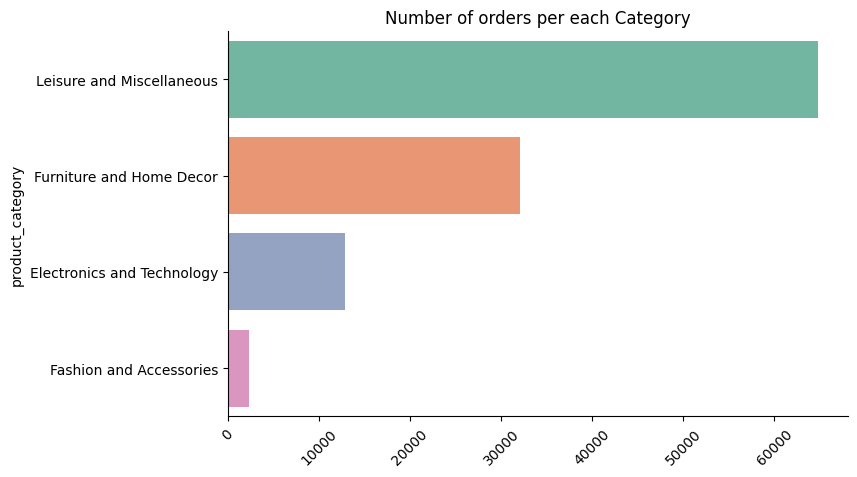

In [110]:
plt.figure(figsize = (8, 5))
sns.barplot(x = df_final['product_category'].value_counts().values, 
            y = df_final['product_category'].value_counts().index, 
            palette = 'Set2')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

In [111]:
# résultat franchement desequilibré...

In [112]:
# (WIP) Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
# mettre shipping limit date en datetime avant
#df_final.drop((df_final[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_final['shipping_limit_date'] < 0]).index, inplace = True)

In [113]:
# (WIP) - idem que cellule précédante, passer dates str -> dt
"""
# Shipping stat  S <-> C
# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'
df_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')
# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'
df_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')
"""

"\n# Shipping stat  S <-> C\n# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'\ndf_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'\ndf_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n"

In [114]:
########## DATES ##########

# 'order_purchase_timestamp'
# 'order_approved_at'
# 'order_delivered_carrier_date'
# 'order_delivered_customer_date'
# 'order_estimated_delivery_date'
# 'shipping_limit_date'
# 'review_creation_date'
# 'review_answer_timestamp'

# convertir en dt
dates_to_convert = ['review_answer_timestamp',
                    'review_creation_date',
                    'order_purchase_timestamp',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date']

for x in dates_to_convert:
    df_final[x] = pd.to_datetime(df_final[x])

# créer les nouvelles features :
# - delta entre date envoi questionnaire satisfaction et réponse (pour avoir vitesse de réponse)
df_final['review_time'] = (df_final['review_answer_timestamp'] - df_final['review_creation_date']).dt.total_seconds()/(3600*24)

# - delta entre date d'achat et date effective de livraison
df_final['order_time'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.total_seconds()/(3600*24)

# - delta entre livraison estimée et livraison effective
df_final['delivery_error_time'] = (df_final['order_delivered_customer_date'] - df_final['order_estimated_delivery_date']).dt.total_seconds()/(3600*24)

# - delta envoi de la commande par le vendeur (temps de préparation de la commande)
df_final['order_preparation_time'] = (df_final['order_delivered_carrier_date'] - df_final['order_approved_at']).dt.total_seconds()/(3600*24)

# - temps de livraison
df_final['delivery_time'] = (df_final['order_delivered_customer_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# - est ce que le vendeur a dépassé le shipping limit date ou non ?
df_final['shipping_limit_respect'] = (df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# drop features qui ne nous intéressent plus
df_final.drop(['review_answer_timestamp',
                    'review_creation_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date'], axis = 1, inplace = True)

# Ajout heure, jour, mois de l'achat
df_final['purchase_time']  = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['purchase_year'] = df_final['purchase_time'].dt.year
df_final['purchase_month'] = df_final['purchase_time'].dt.month
df_final['purchase_dayofweek'] = df_final['purchase_time'].dt.dayofweek
df_final['purchase_day'] = df_final['purchase_time'].dt.day
df_final['purchase_hour'] = df_final['purchase_time'].dt.hour

In [115]:
df_final['purchase_year'].unique()

array([2017., 2018.,   nan, 2016.])

In [116]:
########### REVIEWS ##########

df_final.loc[df_final['review_comment_message'].isna()]

# new feature -> review text oui/non

#df_final['full_written_review'] = 1
#df_final['full_written_review'].loc[df_final['review_comment_message'].isna()] = 0

#df_final['written_review_title'] = 1
#df_final['written_review_title'].loc[df_final['review_comment_title'].isna()] = 0

df_final['review'] = 1
df_final['review'].loc[df_final['review_comment_message'].isna()] = 0
df_final['review'].loc[df_final['review_comment_title'].isna()] = 0

# drop les titres et textes des reviews (en portugais)
df_final.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [117]:
########### VOLUME (cm3) ##########
# volume = height*lenght*width (va permettre de passer de 3 variables à 1)

df_final['product_volume_cm3'] = df_final['product_length_cm'] \
                               * df_final['product_height_cm'] \
                               * df_final['product_width_cm']

df_final.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1, inplace = True)

In [118]:
# frequence des commandes

# 2 ans de données -> prendre fréquence sur 6 mois ? ou prendre sur toutes les données ?

In [119]:
# https://blog.smile.io/how-to-calculate-purchase-frequency/

# customer order frequency = purchase frequency
# number of times that your customers make a purchase from you within a specified period of time

# Repeat Purchase Rate (RPR)
# = number of customers who bought more than once (365 days) divided by number of customers (365 days)

# Purchase Frequency (PF)
# = number of orders (365 days) divided by number of unique customers (365 days)

# Time Between Purchases (TBP)
# = 365 days divided by purchase frequency

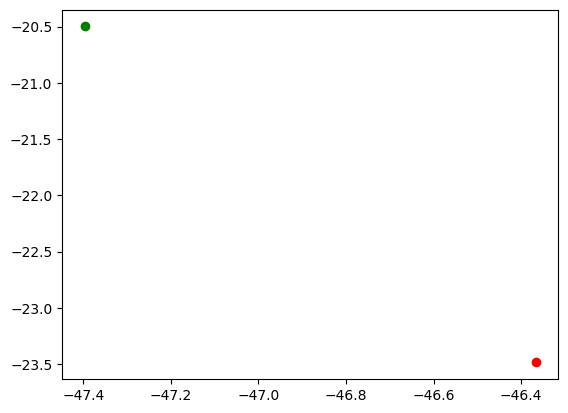

In [120]:
# plotter customer et seller -> TO DO -> VOIR SI J'ARRIVE A FAIRE  (parce que un peu moisi en l'état)

plt.figure()
plt.scatter(x = df_final['seller_geolocation_lng'][0], y = df_final['seller_geolocation_lat'][0], c = 'red') # sellers
plt.scatter(x = df_final['customer_geolocation_lng'][0], y = df_final['customer_geolocation_lat'][0], c = 'green') # customers
plt.show()

In [121]:
########### DISTANCE VENDEUR - ACHETEUR (km) ##########
# Calculer distance en km entre vendeur et acheteur

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# calcul de la distance
df_final['distance'] = df_final.apply(lambda x: haversine(x['seller_geolocation_lat'],
                                                          x['seller_geolocation_lng'],
                                                          x['customer_geolocation_lat'],
                                                          x['customer_geolocation_lng']) * 0.90, axis = 1)

# droper coordonnées (car ne sera plus utile)
df_final.drop(
    [
        'seller_geolocation_lat', 
        'seller_geolocation_lng', 
        'customer_geolocation_lat', 
        'customer_geolocation_lng'
    ], 
    axis = 1, 
    inplace = True)

In [122]:
df_final.sample(6)

customer_id                customer_unique_id  \
79897   6188e41fe52974b6d72ec2d69237513b  668f6dfcdc0251b391dc0ebfd50e2036   
66449   7ceb6bd264a93011d92f29004d2fa854  3d7bc770cfdbe423eb80de6893a8e05e   
62604   6ee1dd0b1a877f6ffdc9f75177bd62f7  9350c369262a51cdcf07ab29be34e8e1   
71017   f0af88af20ee8c5df79e8407dafec4a3  2318e0ee6ae8184c5d4aebf3ad338203   
105773  3bb005ea4eafbfe73f8e720b795aa06e  1b23b82407cdce1a111b6c6539ef6963   
15597   4c47d9f33156a83d4daefc9efb32b2c4  e15301f428e7f3779db3030d2b9dcd19   

         customer_city customer_state                          order_id  \
79897        joinville             SC  f205fe90f781292c4c7ea85ba300934b   
66449   belo horizonte             MG  4b460251c3d2ba44dd61b0b6c3410ac6   
62604      joao pessoa             PB  599fbee4cc4b8dabe57ea66e0ecd7031   
71017        guarulhos             SP  dd2f898dab99df4fea7aeb02b77fcd25   
105773        juazeiro             BA  48d0293985d532c653f5d41dbf977030   
15597        sao paulo             SP  285d05509f58145ec6c82cc3407ee55b   

       order_status order_purchase_timestamp  order_item_id  \
79897     delivered      2018-04-22 19:10:39            1.0   
66449   unavailable      2017-03-27 17:19:37            NaN   
62604     delivered      2017-09-17 18:58:07            2.0   
71017     delivered      2017-12-20 18:23:40            1.0   
105773    delivered      2018-02-23 12:46:39            2.0   
15597     delivered      2017-07-30 17:54:39            1.0   

                              product_id                         seller_id  \
79897   2515eea3c60c67ecbb38b2f6b72733a3  aafe36600ce604f205b86b5084d3d767   
66449                                NaN                               NaN   
62604   905b0c0ebfb5ea28af1b5cfb97bbbd27  dc8798cbf453b7e0f98745e396cc5616   
71017   c224f464aeeb2c6af33f0682a181efa7  53e4c6e0f4312d4d2107a8c9cddf45cd   
105773  eb8c629f70275fd1c4f809116cce1efc  1025f0e2d44d7041d6cf58b6550e0bfa   
15597   154e7e31ebfa092203795c972e5804a6  cc419e0650a3c5ba77189a1882b7556a   

         price  freight_value  seller_city seller_state  product_name_lenght  \
79897   119.90          15.85     sao jose           SC                 14.0   
66449      NaN            NaN          NaN          NaN                  NaN   
62604    54.90          21.18    sao paulo           SP                 43.0   
71017   106.00          25.26     pedreira           SP                 60.0   
105773   38.40          17.92    sao paulo           SP                 51.0   
15597    19.99           7.78  santo andre           SP                 48.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
79897                        268.0                 2.0            1100.0   
66449                          NaN                 NaN               NaN   
62604                       1621.0                 2.0             500.0   
71017                       1809.0                 1.0           12600.0   
105773                       831.0                 1.0            1400.0   
15597                        575.0                 1.0             100.0   

        payment_sequential payment_type  payment_installments  payment_value  \
79897                  1.0  credit_card                   2.0         135.75   
66449                  1.0  credit_card                   9.0        1400.00   
62604                  1.0       boleto                   1.0         152.16   
71017                  1.0  credit_card                   4.0         131.26   
105773                 1.0  credit_card                   5.0         112.64   
15597                  1.0  credit_card                   1.0          27.77   

                               review_id  review_score  \
79897   f46b33cc9e82c99ea7bcfec34ad87cee           1.0   
66449   90018c08b2ca29dddcf499cfa5ec54d8           3.0   
62604   7a9bd787bcac454ffd0b4602223e54e2           5.0   
71017   9cb929eff1f17da1b2d8aee32ca60491           5.0   
105773  9afe98fdd5777f

In [123]:
# Export données 'propres' au format pickle pour rfm (garder id etc)

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df_for_rfm')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df_final, f)

## Pré selection des variables

In [124]:
########## Drop des variables non pertinentes pour le clustering ##########

# Dropper les identifiants (ne seront plus utiles par la suite), purchase_time et 
# order_purchase_timestamp (dates et heures) ainsi que les villes, états... (on garde les coordonnées geo)

features_to_drop = [
    'customer_id', 
    'customer_unique_id', 
    'order_id', 
    'order_item_id', 
    'product_id', 
    'seller_id', 
    'review_id', 
    'purchase_time', 
    'order_purchase_timestamp', 
    'customer_city', 
    'customer_state', 
    'seller_city', 
    'seller_state'
]


df = df_final.drop(features_to_drop, 
                   axis = 1)

df.sample(5)

order_status  price  freight_value  product_name_lenght  \
3371      delivered  680.0         158.38                 54.0   
12038     delivered  250.0          37.77                 57.0   
70398     delivered   70.0          13.32                 57.0   
38645     delivered   56.7          14.49                 51.0   
117108    delivered   69.9          14.24                 41.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
3371                         424.0                 1.0           30000.0   
12038                        771.0                 1.0           12000.0   
70398                        272.0                 1.0            2500.0   
38645                        703.0                 6.0            8550.0   
117108                       781.0                 4.0             500.0   

        payment_sequential payment_type  payment_installments  payment_value  \
3371                   1.0  credit_card                  10.0         838.38   
12038                  1.0  credit_card                   4.0         287.77   
70398                  1.0       boleto                   1.0          83.32   
38645                  1.0  credit_card                   2.0          71.19   
117108                 1.0       boleto                   1.0          84.14   

        review_score           product_category  review_time  order_time  \
3371             5.0  Leisure and Miscellaneous      3.03292    49.46501   
12038            5.0  Leisure and Miscellaneous      3.53554     6.26421   
70398            5.0   Furniture and Home Decor      1.10690     3.04529   
38645            4.0  Leisure and Miscellaneous      1.52881     7.06940   
117108           5.0  Leisure and Miscellaneous      3.73747     7.12981   

        delivery_error_time  order_preparation_time  delivery_time  \
3371                7.32088                13.35895       36.09723   
12038             -12.99620                 1.02045        5.22963   
70398              -4.03939                 0.33522        1.48284   
38645             -11.07310                 0.73652        6.32204   
117108            -12.08492                 0.68880        6.40943   

        shipping_limit_respect  purchase_year  purchase_month  \
3371                   5.64105         2017.0             4.0   
12038                  5.97955         2018.0             3.0   
70398                  3.66478         2018.0             7.0   
38645                  6.26348         2018.0             4.0   
117108                 5.31120         2017.0            10.0   

        purchase_dayofweek  purchase_day  purchase_hour  review  \
3371                   3.0          13.0           20.0       0   
12038                  3.0          22.0           17.0       0   
70398                  1.0          24.0           21.0       0   
38645                  2.0          25.0           20.0       0   
117108                 1.0          17.0           18.0       0   

        product_volume_cm3    distance  
3371              251625.0  1382.07882  
12038              70875.0   210.82074  
70398              12000.0    12.24047  
38645              19712.0   370.21587  
117108              6000.0   879.41175

## Duplicats

In [125]:
# Vérifier qu'il n'y a pas de duplicats

print("\nPourcentage de duplicats :", end = "\n = ")
print(round((df.duplicated().sum().sum()/np.product(df.shape))*100, 2), end = " % \n")


Pourcentage de duplicats :
 = 0.35 % 


In [126]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119013    False
119014    False
119015    False
119016    False
119017    False
Length: 119018, dtype: bool

In [127]:
df.drop_duplicates(inplace = True)

## Imputation valeurs manquantes

In [128]:
df.shape

(107774, 27)

In [129]:
# ICI faire "controle qualité" et regarder données manquantes + faire imputation données manquantes ou drop des variables pour lesquelles les données sont trop éparses
df.isna().sum()

order_status                     1
price                          652
freight_value                  652
product_name_lenght           2198
product_description_lenght    2198
product_photos_qty            2198
product_weight_g               670
payment_sequential               2
payment_type                     2
payment_installments             2
payment_value                    2
review_score                   829
product_category              6043
review_time                    829
order_time                    2529
delivery_error_time           2529
order_preparation_time        1339
delivery_time                 2530
shipping_limit_respect        1326
purchase_year                    1
purchase_month                   1
purchase_dayofweek               1
purchase_day                     1
purchase_hour                    1
review                           0
product_volume_cm3             670
distance                      1181
dtype: int64

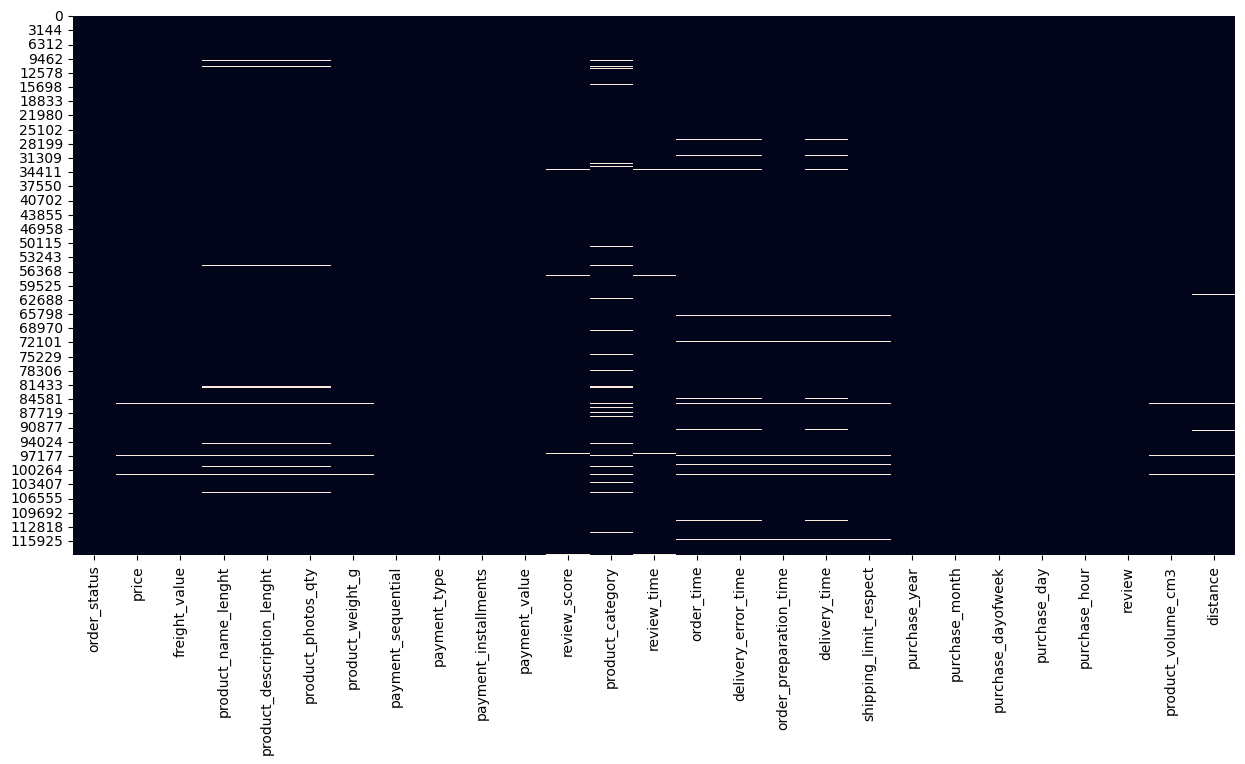

In [130]:
# heatmap des na
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [131]:
# Plusieurs lignes sur la heatmap -> commandes pour lesquelles il y a beaucoup de données manquantes
# sont probablement les commandes qui n'ont pas abouti
# les supprimer - on a 41 variables, prendre un seuil de 15 ou 20 variables pour dropper

# nombre de lignes avant traitement -> 119018
# seuil < 20 NaN -> 118377 rows restants
# seuil < 15 NaN -> 117740 rows restants
# seuil < 10 NaN -> 117738 rows restants
# -> peu de différences entre 10 et 15 - prendre 10

df = df[df.isna().sum(axis = 1) < 10]

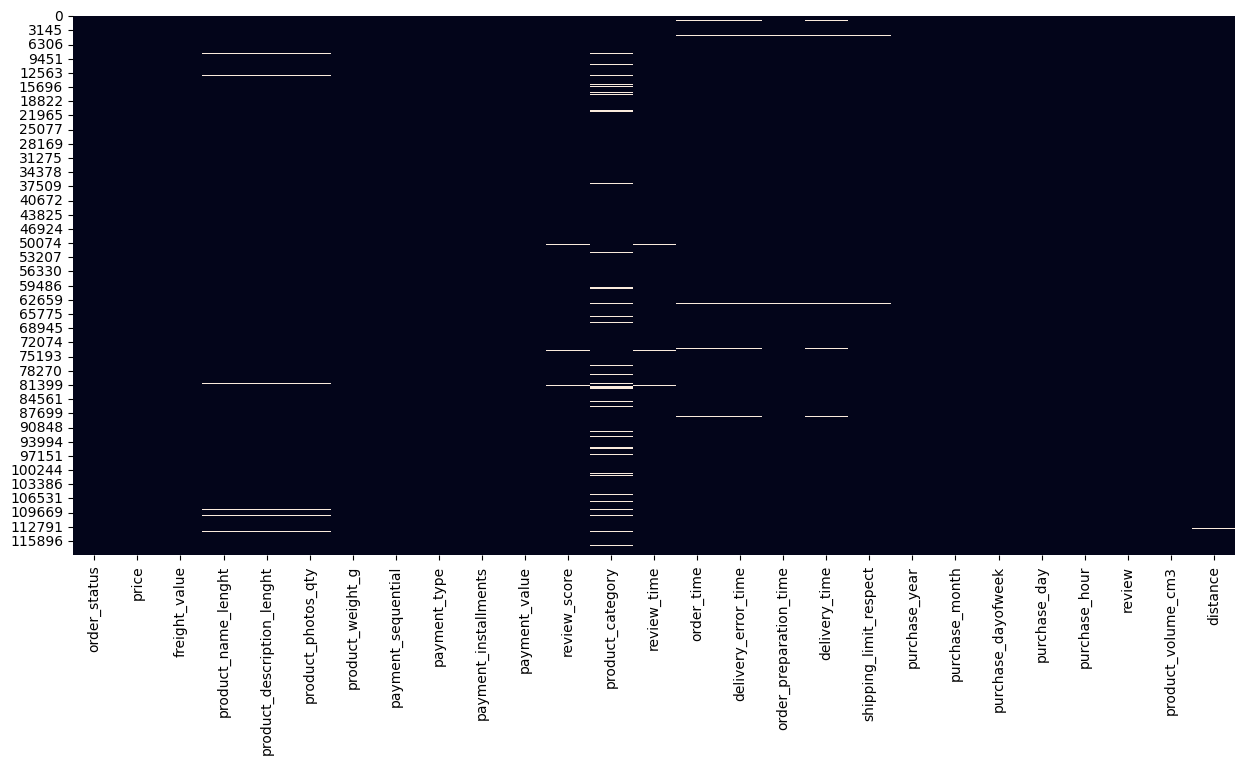

In [132]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107121 entries, 0 to 119017
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_status                107121 non-null  object 
 1   price                       107121 non-null  float64
 2   freight_value               107121 non-null  float64
 3   product_name_lenght         105576 non-null  float64
 4   product_description_lenght  105576 non-null  float64
 5   product_photos_qty          105576 non-null  float64
 6   product_weight_g            107103 non-null  float64
 7   payment_sequential          107120 non-null  float64
 8   payment_type                107120 non-null  object 
 9   payment_installments        107120 non-null  float64
 10  payment_value               107120 non-null  float64
 11  review_score                106310 non-null  float64
 12  product_category            101731 non-null  object 
 13  review_time        

In [134]:
# tableau nombre et pourcentage de valeurs manquantes par colonne
print('\nValeurs manquantes par colonne : \n')
pd.set_option('display.max_rows', None) # pour afficher toutes les lignes
values = df.isnull().sum()
percentage = 100 * values / len(df)
table = pd.concat([values, percentage.round(2)], axis = 1)
table.columns = ['Nombres de valeurs manquantes', '% de valeurs manquantes']
display(table[table['Nombres de valeurs manquantes'] != 0].sort_values('% de valeurs manquantes', ascending = False))
pd.reset_option('display.max_rows') # on reset l'option pour ne plus afficher toutes les lignes


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
product_category                                     5390   
delivery_time                                        1877   
delivery_error_time                                  1876   
order_time                                           1876   
product_description_lenght                           1545   
product_name_lenght                                  1545   
product_photos_qty                                   1545   
review_score                                          811   
review_time                                           811   
order_preparation_time                                687   
shipping_limit_respect                                673   
distance                                              529   
product_weight_g                                       18   
product_volume_cm3                                     18   
payment_installments                                    1   
payment_value                                           1   
payment_type                                            1   
payment_sequential                                      1   

                            % de valeurs manquantes  
product_category                               5.03  
delivery_time                                  1.75  
delivery_error_time                            1.75  
order_time                                     1.75  
product_description_lenght                     1.44  
product_name_lenght                            1.44  
product_photos_qty                             1.44  
review_score                                   0.76  
review_time                                    0.76  
order_preparation_time                         0.64  
shipping_limit_respect                         0.63  
distance                                       0.49  
product_weight_g                               0.02  
product_volume_cm3                             0.02  
payment_installments                           0.00  
payment_value                                  0.00  
payment_type                                   0.00  
payment_sequential                             0.00

In [135]:
# Variables pour lesquelles il reste des NaN (faible pourcentage):

# VARIABLES QUALI
## product_category_name_english
## payment_type

# VARIABLES QUANTI
## payment_sequential
## product_name_lenght
## product_description_lenght
## product_photos_qty
## product_weight_g
## payment_installments
## payment_value
## review_score
## review_time
## order_time
## delivery_error_time
## order_preparation_time
## delivery_time
## shipping_limit_respect
## product_volume_cm3
## distance

In [136]:
# VARIABLES QUALI
# Traiter modalité par modalité et remplacer les NaN par la modalité la plus fréquente

# Catégories de produits
df['product_category'].value_counts()

product_category
Leisure and Miscellaneous     60063
Furniture and Home Decor      27807
Electronics and Technology    11582
Fashion and Accessories        2279
Name: count, dtype: int64

In [137]:
# Most common = 'bed_bath_table' - ou remplacer par 'unknown' ?? ou par rien ?

df['product_category'].fillna('', inplace = True)

In [138]:
# Type de paiement
df['payment_type'].value_counts()

payment_type
credit_card    79295
boleto         20337
voucher         5904
debit_card      1584
Name: count, dtype: int64

In [139]:
# Most common = credit_card

df_final['payment_type'].fillna('credit_card', inplace = True)

In [140]:
# VARIABLES QUANTI

df_con = df.select_dtypes(include = ['int', 'float'])
col = df_con.columns

In [141]:
df_con.shape

(107121, 24)

In [142]:
# CHOIX DE K

# dépend du pb -> si supervisé -> comme projet 4
# dépend du métier -> des fois certains nb de voisins font sens
# quand non supervisé -> cacher des valeurs et voir avec quel K on les trouve (très rarement fait)
# prendre valeur par défaut

# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

# "The optimal K value usually found is the square root of N, where N is the total number of samples."

# Nb samples
N = df_con.shape[0]

optimal_K = sqrt(N)
optimal_K

327.2934463138546

In [143]:
# mouaaaaaaaai....

In [144]:
# KNN imputer
KNN_imputer = KNNImputer()
df_KNN = KNN_imputer.fit_transform(df_con)

In [145]:
# donne un array - le convertir en df
df_con = pd.DataFrame(df_KNN, columns = col)

In [146]:
# mettre variables quali au même format que quanti
df_cat = df.select_dtypes(include = ['object'])
col = df_cat.columns

df = pd.concat([df_con, df_cat], axis = 1, join = 'inner')
df

price  freight_value  product_name_lenght  \
0       124.99          21.88                 41.0   
1       289.00          46.48                 43.0   
2       139.94          17.79                 55.0   
3       149.94          23.36                 48.0   
4       230.00          22.25                 61.0   
...        ...            ...                  ...   
107115   55.00          20.88                 12.0   
107116   74.90          13.88                 51.0   
107117  114.90          14.16                 51.0   
107118   37.00          19.04                 60.0   
107120   13.99           7.78                 54.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                           1141.0                 1.0            8683.0   
1                           1002.0                 3.0           10150.0   
2                            955.0                 1.0            8267.0   
3                           1066.0                 1.0           12160.0   
4                            407.0                 1.0            5200.0   
...                            ...                 ...               ...   
107115                       210.0                 2.0            1100.0   
107116                       489.0                 2.0             611.0   
107117                      1193.0                 1.0            1211.0   
107118                       575.0                 1.0             870.0   
107120                       933.0                 1.0              50.0   

        payment_sequential  payment_installments  payment_value  review_score  \
0                      1.0                   2.0         146.87           4.0   
1                      1.0                   8.0         335.48           5.0   
2                      1.0                   7.0         157.73           5.0   
3                      1.0                   1.0         173.30           5.0   
4                      1.0                   8.0         252.25           5.0   
...                    ...                   ...            ...           ...   
107115                 1.0                   1.0          75.88           1.0   
107116                 1.0                   6.0          88.78           4.0   
107117                 1.0                   3.0         129.06           5.0   
107118                 1.0                   5.0          56.04           1.0   
107120                 1.0                   1.0          21.77           5.0   

        review_time  order_time  delivery_error_time  order_preparation_time  \
0           4.94074     8.81250            -10.55862                 6.80955   
1          11.94686    16.66175             -7.47131                 2.84476   
2           0.50763    26.07715              1.74920                21.92488   
3           4.77554    14.99846            -12.33027                14.24541   
4           7.08324    11.46132             -5.12792                 1.21240   
...             ...         ...                  ...                     ...   
107115      0.93984    17.57944            -18.45272                 2.77409   
107116     14.46880     6.17940            -11.16207                 3.41656   
107117      4.44172     7.44054             -8.21198                 1.42179   
107118      4.07022    30.95237              7.79392                 0.89044   
107120      0.97299     7.17723            -12.22042                 2.01854   

        delivery_time  shipping_limit_respect  purchase_year  purchase_month  \
0             1.99141                -0.80955         2017.0             5.0   
1            13.80995                 3.15524         2018.0             1.0   
2             3.14434                -5.92488         2018.0             5.0   
3             0.69564                -0.28572         2018.0             3.0   
4            10.23597                 0.78760         2018.0             7.0   
...               ...            

In [147]:
df.isna().sum()

price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
review_time                   0
order_time                    0
delivery_error_time           0
order_preparation_time        0
delivery_time                 0
shipping_limit_respect        0
purchase_year                 0
purchase_month                0
purchase_dayofweek            0
purchase_day                  0
purchase_hour                 0
review                        0
product_volume_cm3            0
distance                      0
order_status                  0
payment_type                  1
product_category              0
dtype: int64

## Outliers

In [148]:
# plus de nan -> ok pour isolation forest

# outliers detectés grâce aux boxplots
# vérifier avec Isolation Forest et supprimer lignes correspondantes

np.random.seed(1)

clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([ 1,  1,  1, ...,  1, -1,  1])

In [149]:
# anomalies ont un score de -1 : on les enlève
df.drop(df.iloc[np.where(preds == -1)[0]].index, inplace = True)

df.shape

(88873, 27)

## Analyse univariée

In [150]:
# Faire une analyse par variable pour avoir quelque chose de propre et bien détécter outliers ou incohérences ?

In [151]:
# faire un graph qui regroupe évolution par mois du nb de commandes, du nb de clients et du CA etc
# idem avec toutes les dates

In [152]:
df.select_dtypes(include = ['float64']).columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'review', 'product_volume_cm3', 'distance'],
      dtype='object')

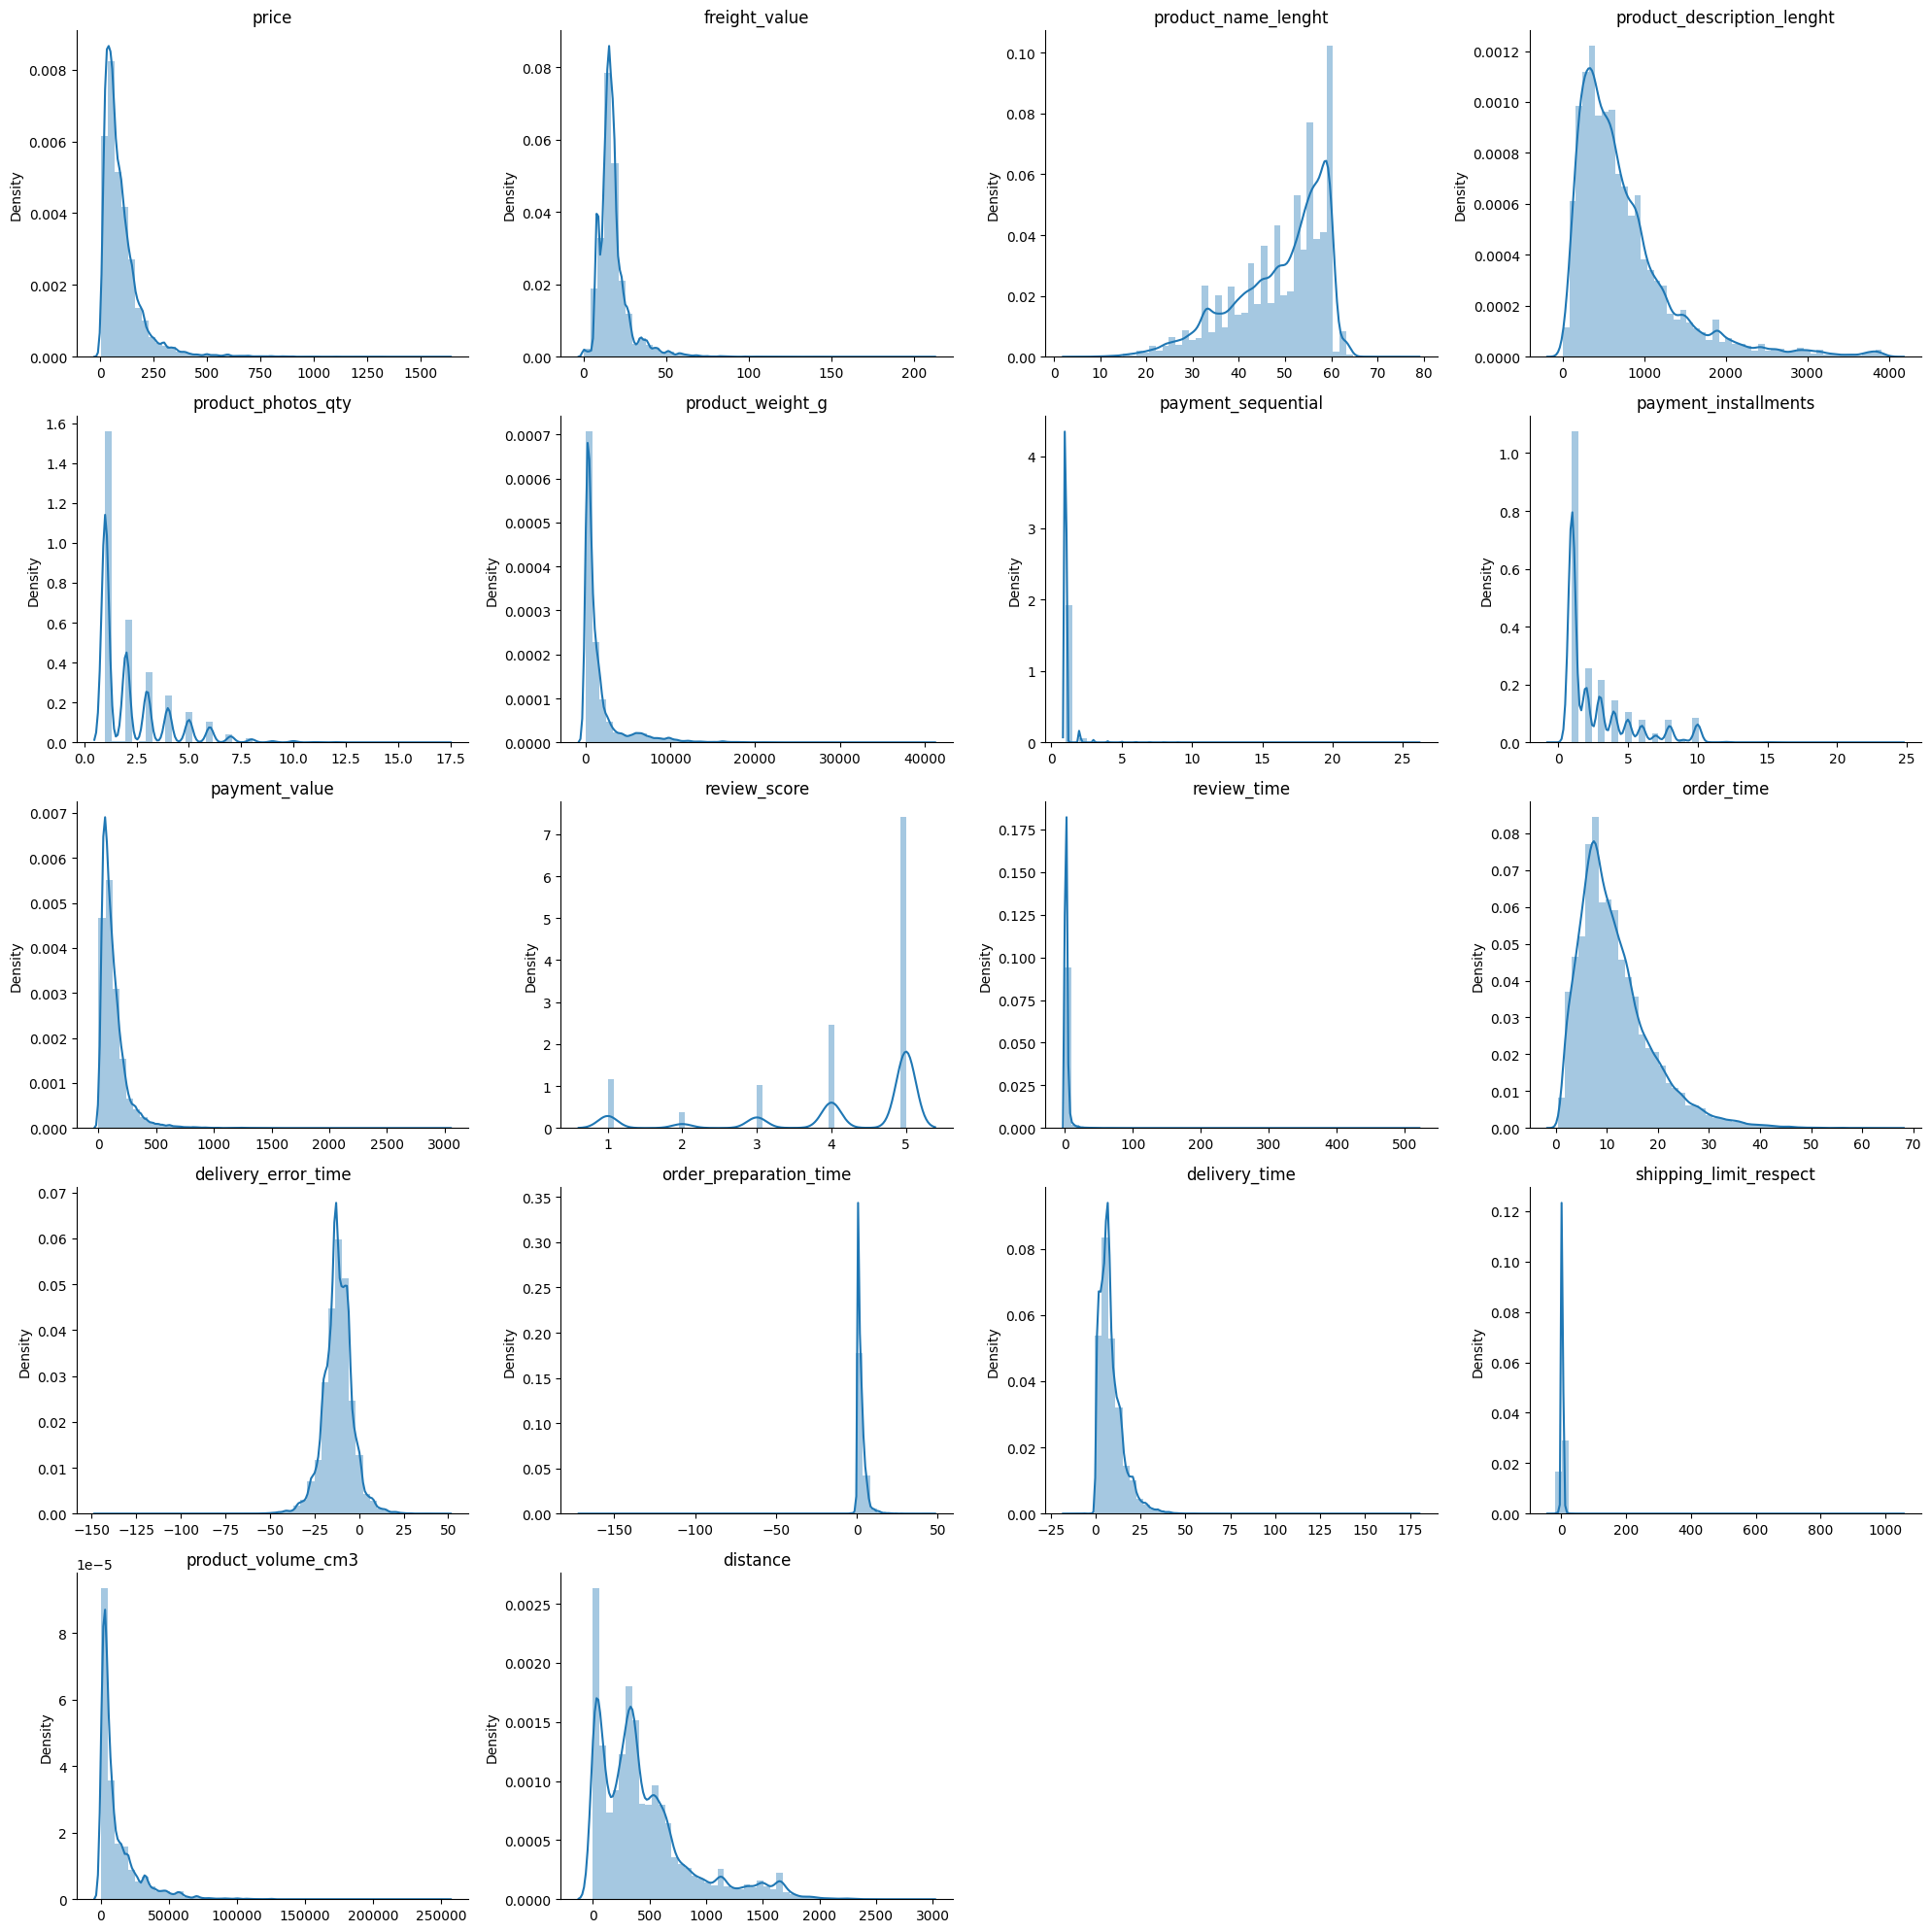

In [153]:
# Displots des variables quantitatives (variables continues seulement)

columns = ['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'product_volume_cm3', 'distance']

nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 20))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 4, index + 1)
    sns.distplot(x = df[col])
    plt.title(col)
    sns.despine() # pour enlever limites du graph en haut et à droite

figure.tight_layout()
plt.show()

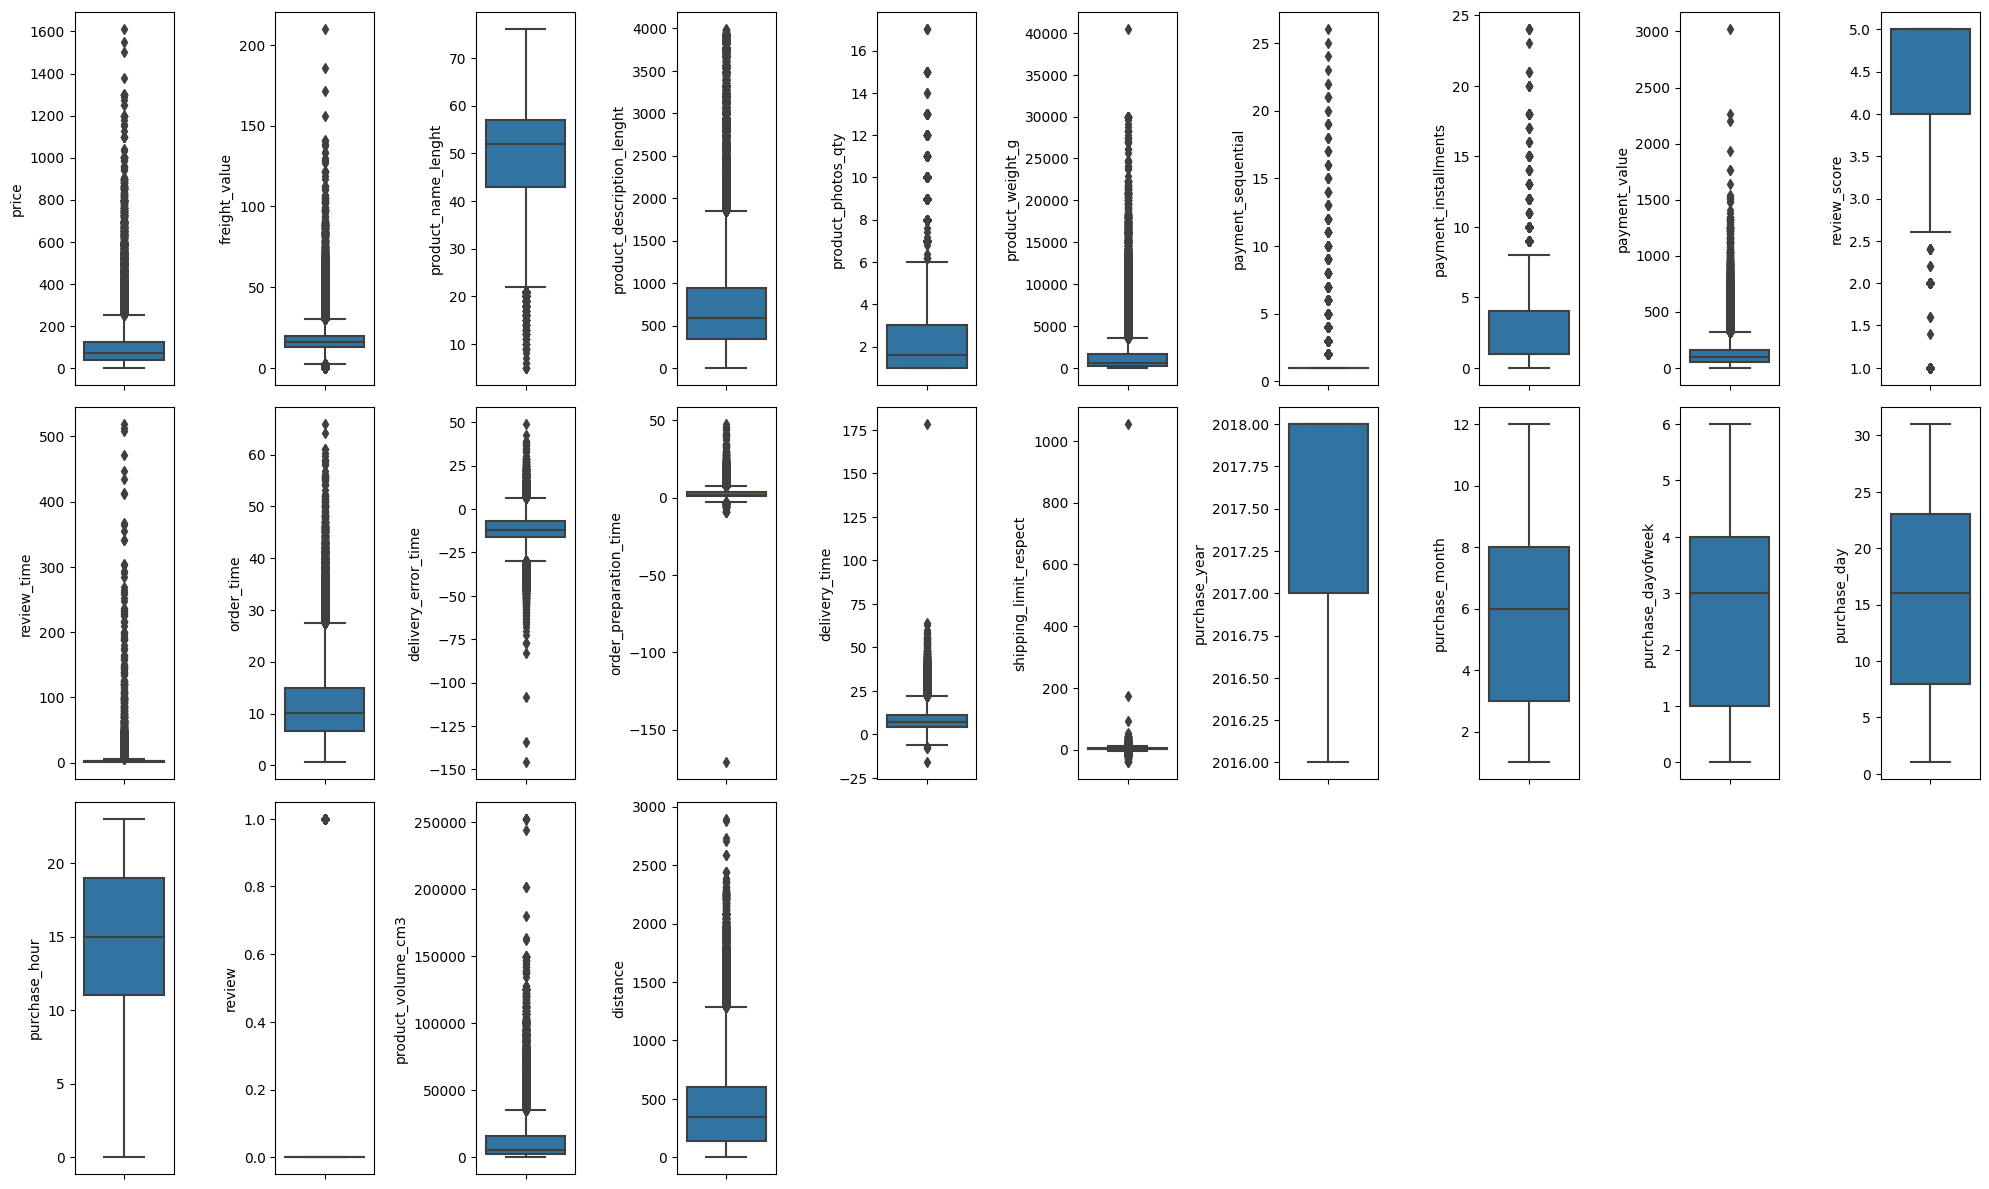

In [154]:
# Boxplots des variables quantitatives

columns = df.select_dtypes(include = ['float64']).columns
nb_lignes = len(columns)/10 # 10 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 12))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 10, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

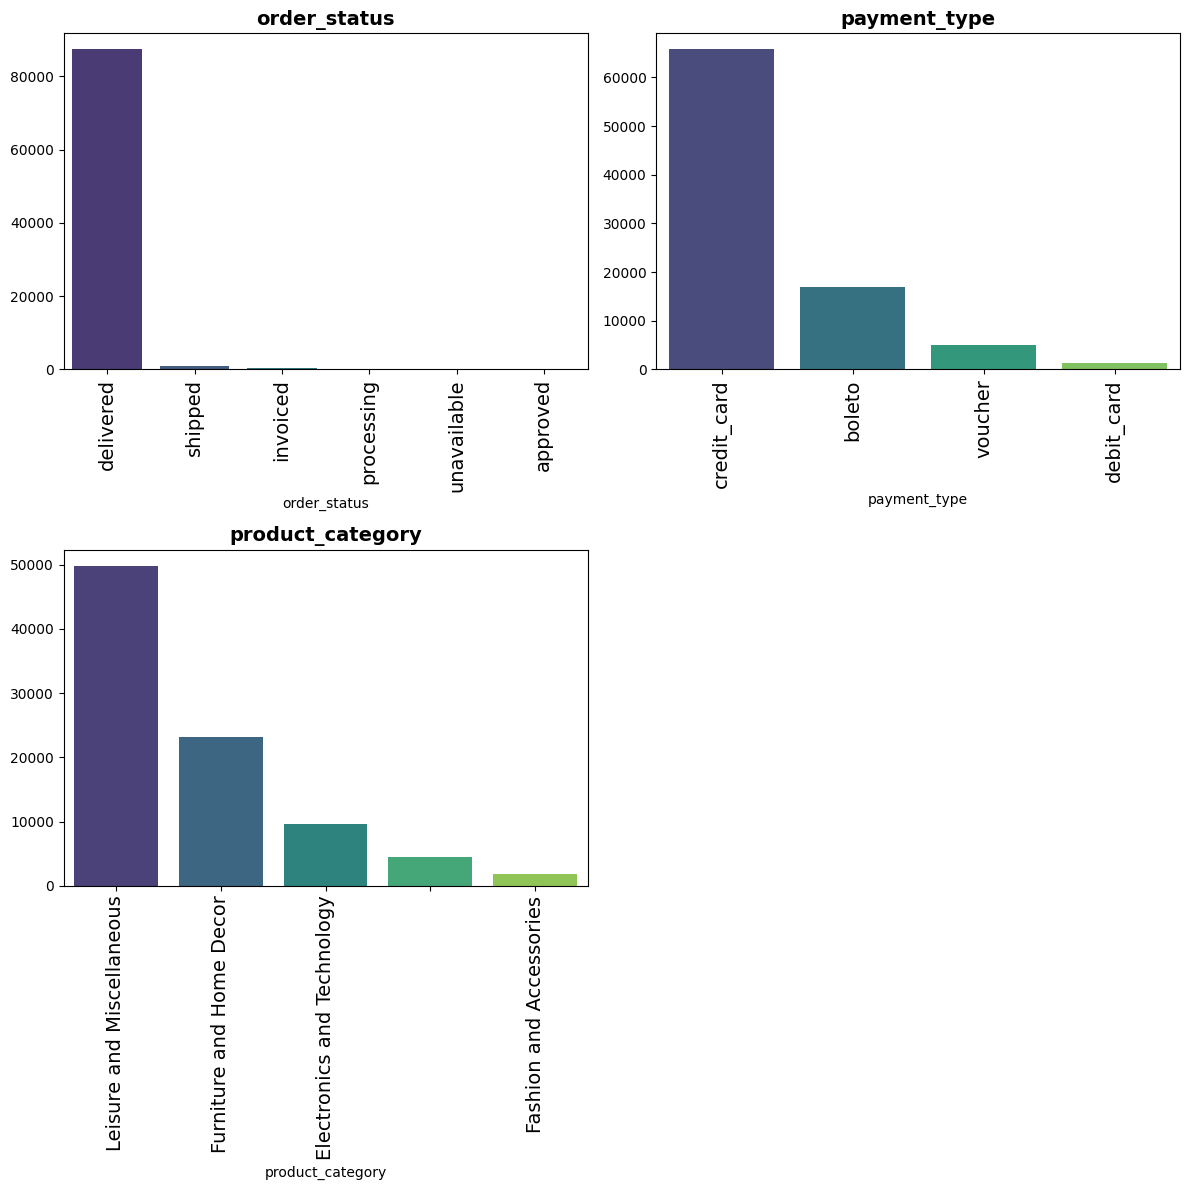

In [155]:
# Barplot des variables qualitatives

columns = df.select_dtypes(include = ['object']).columns
size = round(math.sqrt(len(columns)))

plt.figure(figsize = (12, 12))
i = 0
for index, col in enumerate(columns):
    if df[col].str.len().mean() < 100: # prendre seulement les colonnes dont les elements ne sont pas trop longs (pour ne pas prendre les descriptions par ex)
        i += 1
        plt.subplot(size, size, i)
        plt.title(col, fontsize = 14, weight = 'bold')
        plt.xticks(fontsize = 14, rotation = 90)
        ax = sns.barplot(x = df[col].value_counts().index[:10],
                        y = df[col].value_counts()[:10],
                        palette = 'viridis')
        ax.set(ylabel = None) # pour enlever nom de l'axe y
        plt.tight_layout()
plt.show()

In [156]:
# Order status -> à pas l'air franchement interessant - à ignorer pour le clustering

## Analyse bivariée

In [157]:
df

price  freight_value  product_name_lenght  \
0       124.99          21.88                 41.0   
1       289.00          46.48                 43.0   
2       139.94          17.79                 55.0   
3       149.94          23.36                 48.0   
4       230.00          22.25                 61.0   
...        ...            ...                  ...   
107114  124.90           7.74                 35.0   
107115   55.00          20.88                 12.0   
107116   74.90          13.88                 51.0   
107117  114.90          14.16                 51.0   
107120   13.99           7.78                 54.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                           1141.0                 1.0            8683.0   
1                           1002.0                 3.0           10150.0   
2                            955.0                 1.0            8267.0   
3                           1066.0                 1.0           12160.0   
4                            407.0                 1.0            5200.0   
...                            ...                 ...               ...   
107114                       514.0                 2.0            4338.0   
107115                       210.0                 2.0            1100.0   
107116                       489.0                 2.0             611.0   
107117                      1193.0                 1.0            1211.0   
107120                       933.0                 1.0              50.0   

        payment_sequential  payment_installments  payment_value  review_score  \
0                      1.0                   2.0         146.87           4.0   
1                      1.0                   8.0         335.48           5.0   
2                      1.0                   7.0         157.73           5.0   
3                      1.0                   1.0         173.30           5.0   
4                      1.0                   8.0         252.25           5.0   
...                    ...                   ...            ...           ...   
107114                 1.0                   1.0         132.64           4.0   
107115                 1.0                   1.0          75.88           1.0   
107116                 1.0                   6.0          88.78           4.0   
107117                 1.0                   3.0         129.06           5.0   
107120                 1.0                   1.0          21.77           5.0   

        review_time  order_time  delivery_error_time  order_preparation_time  \
0           4.94074     8.81250            -10.55862                 6.80955   
1          11.94686    16.66175             -7.47131                 2.84476   
2           0.50763    26.07715              1.74920                21.92488   
3           4.77554    14.99846            -12.33027                14.24541   
4           7.08324    11.46132             -5.12792                 1.21240   
...             ...         ...                  ...                     ...   
107114      1.58980    17.91031             -0.18514                16.75539   
107115      0.93984    17.57944            -18.45272                 2.77409   
107116     14.46880     6.17940            -11.16207                 3.41656   
107117      4.44172     7.44054             -8.21198                 1.42179   
107120      0.97299     7.17723            -12.22042                 2.01854   

        delivery_time  shipping_limit_respect  purchase_year  purchase_month  \
0             1.99141                -0.80955         2017.0             5.0   
1            13.80995                 3.15524         2018.0             1.0   
2             3.14434                -5.92488         2018.0             5.0   
3             0.69564                -0.28572         2018.0             3.0   
4            10.23597                 0.78760         2018.0             7.0   
...               ...            

In [158]:
df['Count'] = 1

In [159]:
df.groupby('purchase_month')['Count'].sum()

purchase_month
1.0     7274
2.0     7396
3.0     8697
4.0     8382
5.0     9425
6.0     8483
7.0     9378
8.0     9769
9.0     3941
10.0    4409
11.0    6712
12.0    5007
Name: Count, dtype: int64

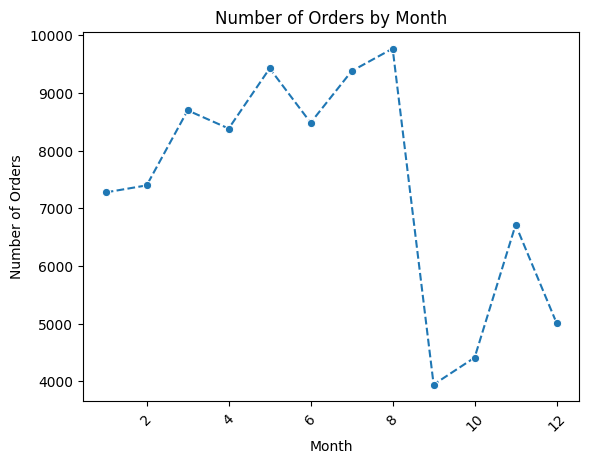

In [160]:
## evolution du nb de commandes par mois

plt.figure()
sns.lineplot(x = df.groupby('purchase_month')['Count'].sum().index,
             y = df.groupby('purchase_month')['Count'].sum().values, 
             marker = 'o', 
             linestyle = '--')
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

In [161]:
# Très peu de commandes en septembre
# Petit pic en Novembre (pour Noel ? )
# Majorité des commandes entre Mars et Aout

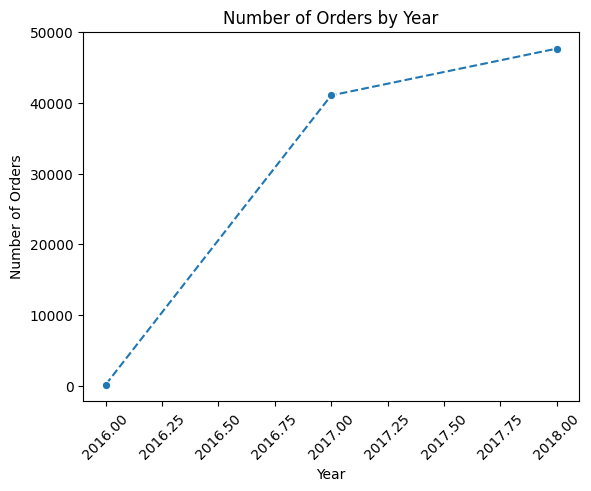

In [162]:
## evolution du nb de commandes par année

plt.figure()
sns.lineplot(x = df.groupby('purchase_year')['Count'].sum().index,
             y = df.groupby('purchase_year')['Count'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

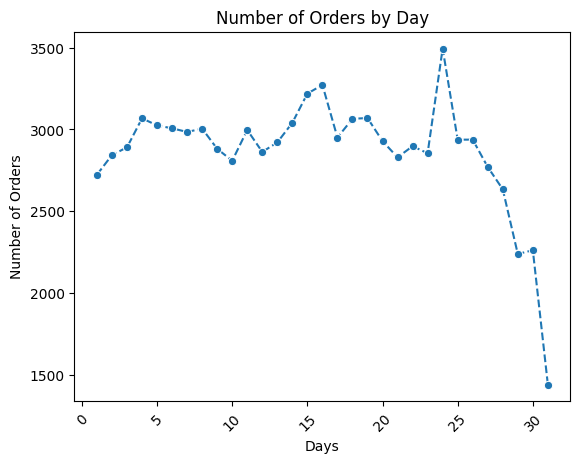

In [163]:
## evolution du nb de commandes par jour du mois

plt.figure()
sns.lineplot(x = df.groupby('purchase_day')['Count'].sum().index,
             y = df.groupby('purchase_day')['Count'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Day')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

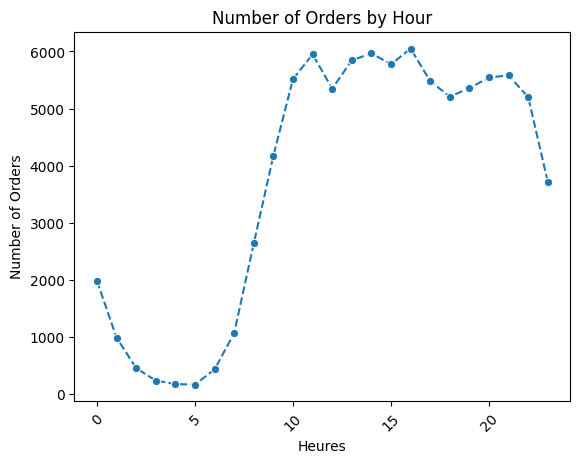

In [164]:
## evolution du nb de commandes par heure de la journée

plt.figure()
sns.lineplot(x = df.groupby('purchase_hour')['Count'].sum().index,
             y = df.groupby('purchase_hour')['Count'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Hour')
plt.xlabel('Heures')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

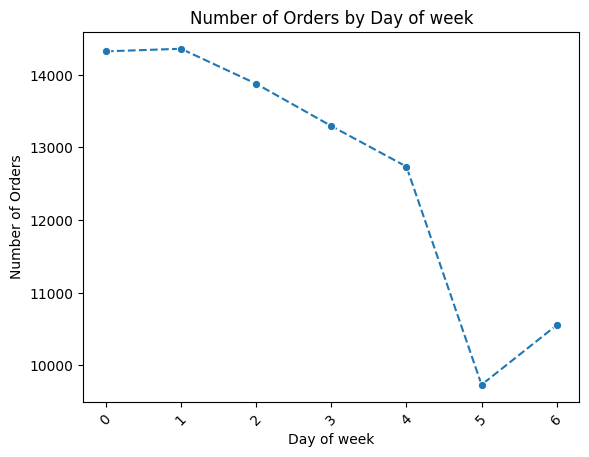

In [165]:
## evolution du nb de commandes par jour de la semaine

plt.figure()
sns.lineplot(x = df.groupby('purchase_dayofweek')['Count'].sum().index,
             y = df.groupby('purchase_dayofweek')['Count'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

In [166]:
# Retrouver correspondance des jours de la semaine (0 = lundi ou 0 = dimanche ? )

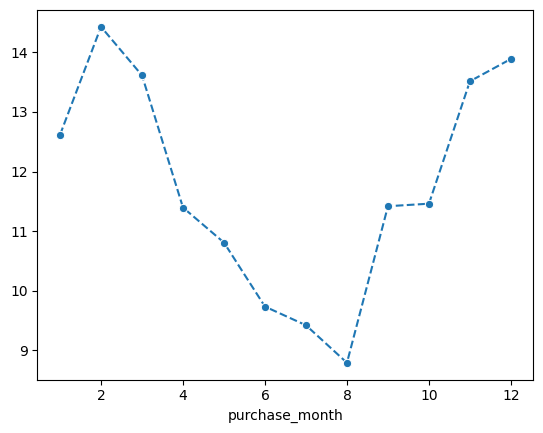

In [167]:
# Evolution du temps des commandes (délai entre commande et livraison)

plt.figure()
sns.lineplot(x = df.groupby('purchase_month')['order_time'].mean().index, 
             y = df.groupby('purchase_month')['order_time'].mean().values, 
             marker = 'o', linestyle = '--')
plt.show()

In [168]:
# délai de préparation des commandes et de livraison très court en été

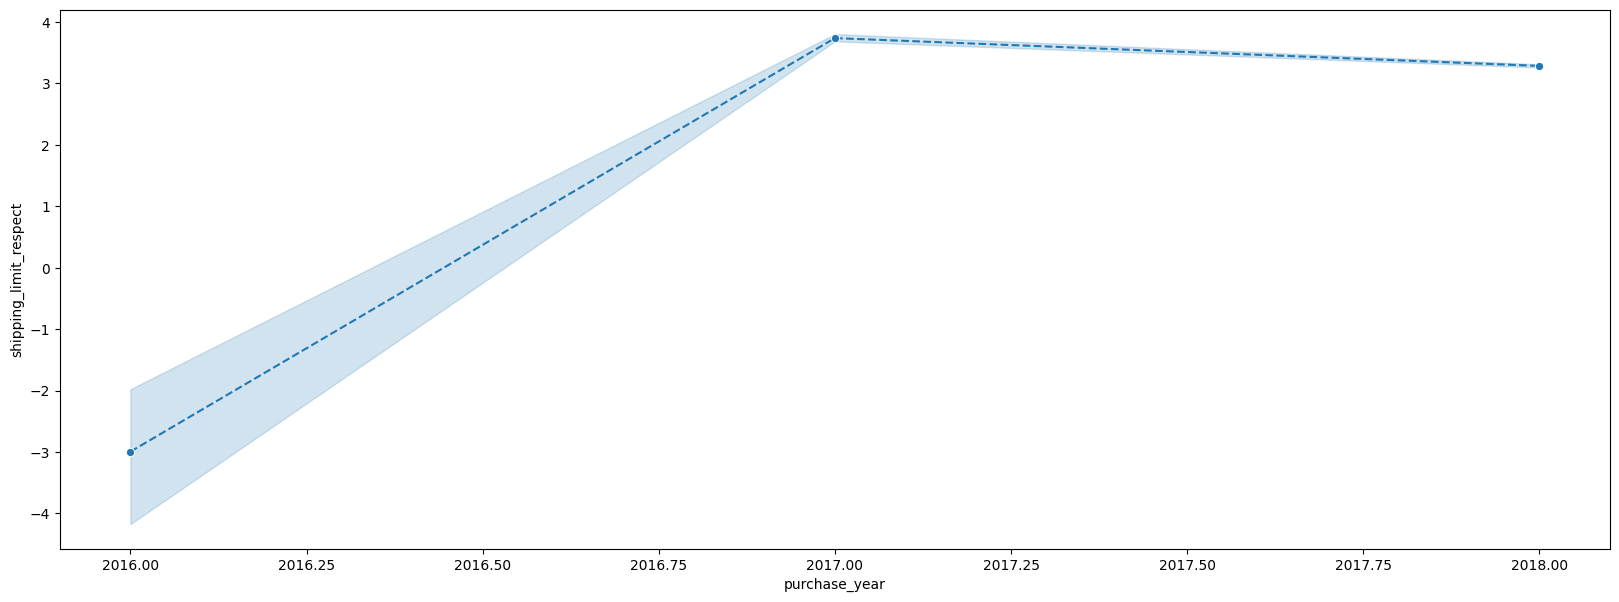

In [169]:
# Evolution du retard de livraison en fonction des années (zoom sur 2017)

plt.figure(figsize = (20, 7))
sns.lineplot(data = df, 
             x = 'purchase_year', 
             y = 'shipping_limit_respect', 
             marker = 'o', linestyle = '--')
plt.show()

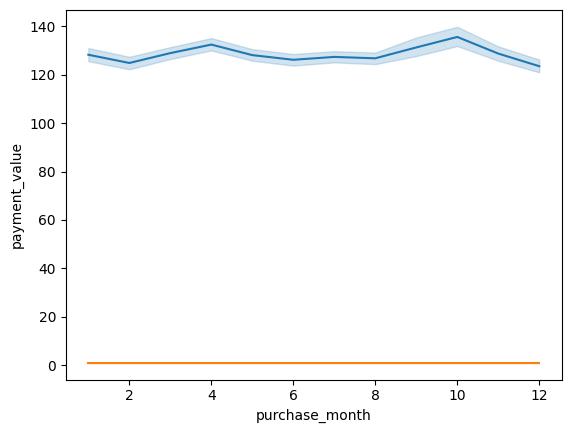

In [170]:
# Ventes de la plateforme par mois vs nb de commandes par mois

plt.figure()
sns.lineplot(data = df, x = 'purchase_month', y = 'payment_value', markers = True)
sns.lineplot(data = df, x = 'purchase_month', y = 'Count', markers = True)
plt.show()

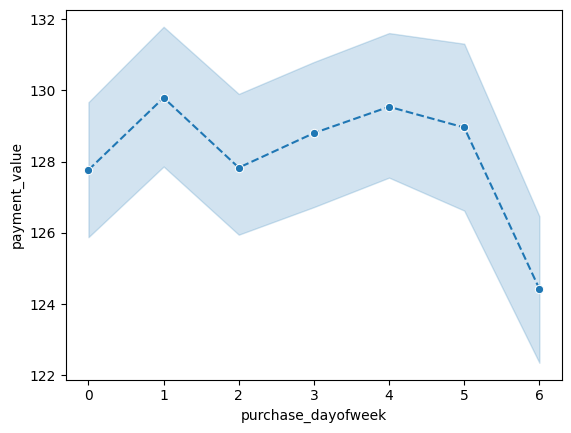

In [171]:
# Ventes de la plateforme par jour de la semaine
# REMPLACER PAR HISTOGRAMME
# METTRE CORRESPONDANCE DES JOURS

plt.figure()
sns.lineplot(data = df, x = 'purchase_dayofweek', y = 'payment_value', marker = 'o', linestyle = '--')
plt.show()

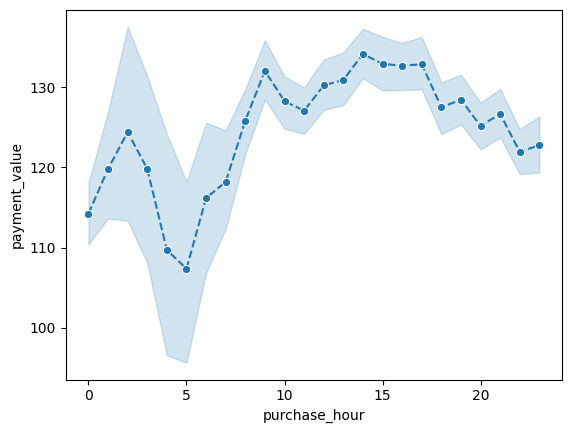

In [172]:
# Ventes de la plateforme par heure de la journée

plt.figure()
sns.lineplot(data = df, x = 'purchase_hour', y = 'payment_value', marker = 'o', linestyle = '--')
plt.show()

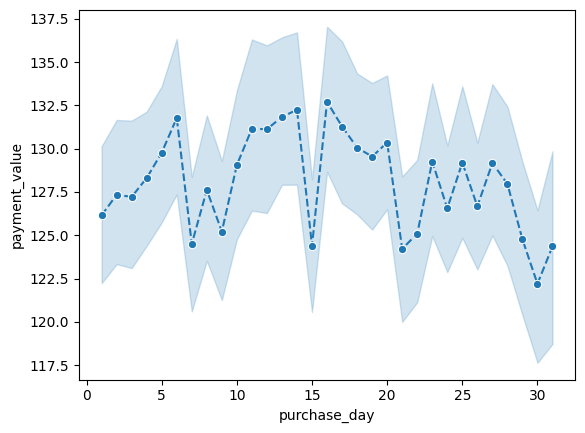

In [173]:
# Ventes de la plateforme par jour du mois
# FAIRE HISTOGRAMMME A LA PLace

plt.figure()
sns.lineplot(data = df, x = 'purchase_day', y = 'payment_value', marker = 'o', linestyle = '--')
plt.show()

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88873 entries, 0 to 107120
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       88873 non-null  float64
 1   freight_value               88873 non-null  float64
 2   product_name_lenght         88873 non-null  float64
 3   product_description_lenght  88873 non-null  float64
 4   product_photos_qty          88873 non-null  float64
 5   product_weight_g            88873 non-null  float64
 6   payment_sequential          88873 non-null  float64
 7   payment_installments        88873 non-null  float64
 8   payment_value               88873 non-null  float64
 9   review_score                88873 non-null  float64
 10  review_time                 88873 non-null  float64
 11  order_time                  88873 non-null  float64
 12  delivery_error_time         88873 non-null  float64
 13  order_preparation_time      88873 n

In [175]:
df.columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'review', 'product_volume_cm3', 'distance',
       'order_status', 'payment_type', 'product_category', 'Count'],
      dtype='object')

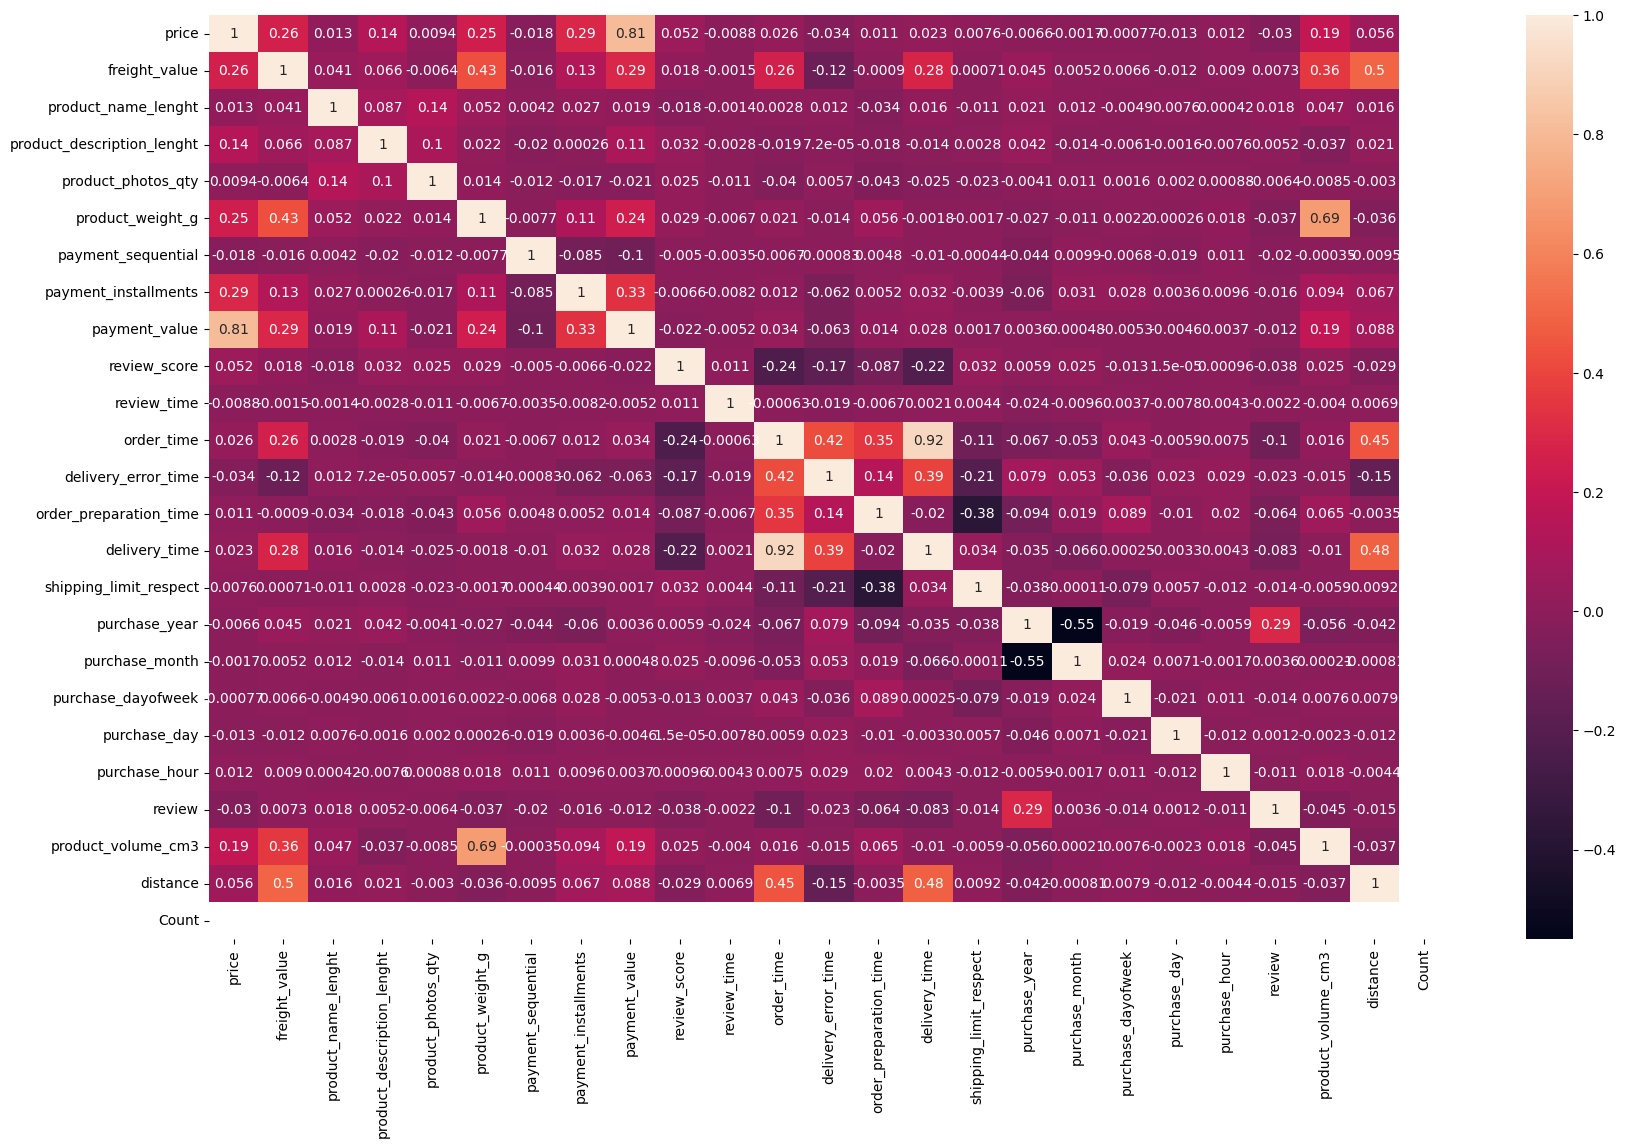

In [177]:
# Matrice de corrélations
plt.figure(figsize = (20, 12))
try:
    sns.heatmap(df.corr(numeric_only = True), annot = True)
except:
    sns.heatmap(df.corr(), annot = True)
plt.show()

In [178]:
# order_time et delivery_time très fortement corrélés -> garder un des deux seulement
# drop delivery_time car n'est pas fonction du client or ici on essaie de segmenter les comportements clients

# poids et volume fortement corrélés -> garder un des deux seulement
# poids et freight_value fortement corrélés
# freight_value et volume sont aussi fortement corrélés (moins que poids mais quand même)
# garder poids et supprimer les deux autres ? ou garder les deux autres et supprimer le poids ?
# supprimer freight_value car prit en compte dans payment_value
# supprimer volume et garder poids -> et faire l'inverse si résultats sont pas bons

# payment_value et price fortement corrélés -> garder un des deux seulement
# garder payment_value (car prend en compte prix de la livraison)

df.drop(['delivery_time', 'price', 'freight_value', 'product_volume_cm3'], axis = 1, inplace = True)

In [179]:
# supprimer aussi purchase_year ?
# on a vu que le nombre de commandes a augmenté avec les années mais sinon pas pertinent pour notre
# problématique
# drop aussi 'count' -> créé seulement pour les graphs

df.drop(['purchase_year', 'Count'], axis = 1, inplace = True)

In [180]:
df.reset_index(drop = True, inplace = True)

In [181]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'review', 'distance', 'order_status',
       'payment_type', 'product_category'],
      dtype='object')

In [182]:
# Pairplot
plt.figure()
#sns.pairplot(df, hue = 'payment_type') # trop lourd avec couleur
#sns.pairplot(df) # trop lourd avec couleur # trop de variables, pas super lisible
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Montant moyen et nombre de transactions
# https://github.com/MGL56/Projet_4/blob/master/Projet_4.ipynb

# Les données sont groupés par la variable 'purchase_weekday' et moyennés
payment_value_weekday = df.groupby("purchase_weekday")["payment_value"] \
                .mean().sort_values(ascending=False).reset_index()
order_weekday = df["purchase_weekday"].value_counts().sort_index()

# Jours de la semaine
WEEK = ["Lundi", "Mardi", "Mercredi",
        "Jeudi", "Vendredi", "Samedi", "Dimanche"]

fig = plt.figure(1, figsize=(20, 10))

# Bar plot du montant moyen dépensé pour chaque jour de la semaine
plt.subplot(121)
sns.barplot(data=payment_value_weekday, x="purchase_weekday",
            y="payment_value")
plt.title("Average Value of Transaction per Day")
plt.xticks(np.arange(7), WEEK, rotation=45)

# Bar plot du nombre de transactions pour chaque jour de la semaine
plt.subplot(122)
sns.barplot(x=order_weekday.index, y=order_weekday.values)
plt.xticks(np.arange(7), WEEK, rotation=45)
plt.title("Number of Transactions per Weekday")

plt.show()

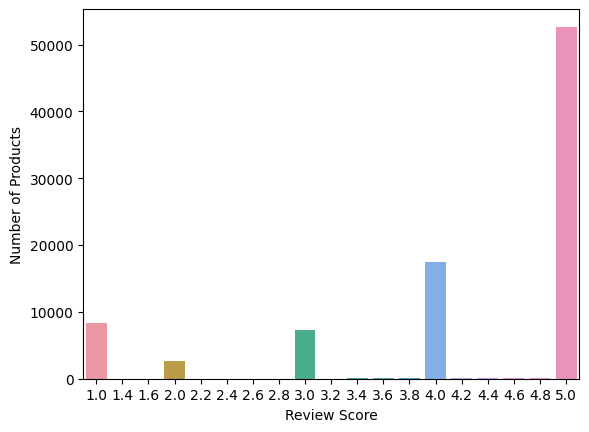

In [186]:
# Evaluation des produits

# Nombre de produits pour chaque note
review_score = df["review_score"].value_counts()
# bar plot du nombre de produits pour chaque note de 1 à 5
sns.barplot(x = review_score.index, y = review_score.values)
plt.ylabel("Number of Products")
plt.xlabel("Review Score")
plt.show()

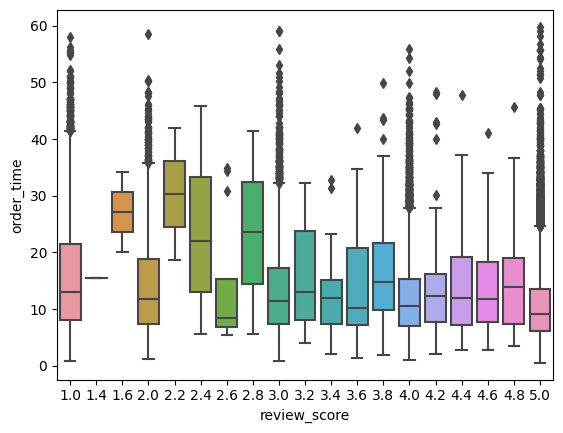

In [187]:

# Boxplot du temps de livraison pour chaque note
sns.boxplot(x="review_score", y="order_time",
            data=df[df["order_time"] < 60])
plt.show()

In [ ]:
# Anova ??

# CONDITIONS D'APPLICATION

In [ ]:
def anova(df, variable):

    print('\t') 
    print('----------------------------------------------------')
    print('\nANOVA \n')
    print('----------------------------------------------------')
    print('\t')

    
    # renommer colonnes pour enlever "-"
    df.columns = df.columns.str.replace('-', '_')

    # calculer dimension des subplots
    columns = df.select_dtypes(include = ['float64']).columns
    size = round(math.sqrt(len(columns)))

    plt.figure(figsize = (25, 15))
    i = 0
    for index, col in enumerate(columns):
        i += 1
        if col != variable:
            mod = ols(f'{col} ~ {variable}', data = df).fit()
            # do type 2 anova
            aov_table = sm.stats.anova_lm(mod, typ = 2)
            print('\t')
            #print("----------------------------------------------------")
            print(f'ANOVA table pour {col}')
            print('----------------------------------------------------')
            display(aov_table)
            print('\t')

            pvalue = round(aov_table['PR(>F)'][variable], 2)

            if aov_table['PR(>F)'][variable] > 0.05:
                print(f" ---> l'hypothèse nulle est acceptée: le {col} ne varie pas selon le {variable}")
                print('\t')
            else:
                print(f" ---> l'hypothèse nulle est rejetée: le {col} varie selon le {variable}")
                print('\t')

        # plot
        plt.subplot(size, size, i)
        plt.title(f'{col} - p-value = {pvalue}')
        sns.boxplot(x = df[col], 
                    y = df[variable], 
                    data = df, 
                    #order=['e', 'd', 'c', 'b', 'a']
                    )
        plt.xticks(rotation = 90)
    plt.tight_layout()
    
    print('\t') 
    print('----------------------------------------------------')
    print(f'\nBoxplot des variables en fonction du {variable}\n')
    print('----------------------------------------------------')
    print('\t')
    
    plt.show()

In [ ]:
# à modifier, beaucoup trop long

In [ ]:
# anova avec nutrition_grade
#anova(df, variable = 'purchase_month')

## Scaling

In [ ]:
df.select_dtypes(include = 'object')

order_status payment_type            product_category
0        delivered  credit_card    Furniture and Home Decor
1        delivered  credit_card    Furniture and Home Decor
2        delivered  credit_card    Furniture and Home Decor
3        delivered  credit_card    Furniture and Home Decor
4        delivered  credit_card                            
...            ...          ...                         ...
88868    delivered  credit_card   Leisure and Miscellaneous
88869    delivered       boleto   Leisure and Miscellaneous
88870    delivered       boleto   Leisure and Miscellaneous
88871    delivered  credit_card   Leisure and Miscellaneous
88872    delivered  credit_card  Electronics and Technology

[88873 rows x 3 columns]

In [ ]:
# standardiser variables quanti

# isoler variables quanti
df_quanti = df.select_dtypes(include = ['int', 'float'])
df_quanti.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'review', 'distance'],
      dtype='object')

In [ ]:
df_quanti

product_name_lenght  product_description_lenght  product_photos_qty  \
0                     41.0                      1141.0                 1.0   
1                     43.0                      1002.0                 3.0   
2                     55.0                       955.0                 1.0   
3                     48.0                      1066.0                 1.0   
4                     61.0                       407.0                 1.0   
...                    ...                         ...                 ...   
88868                 35.0                       514.0                 2.0   
88869                 12.0                       210.0                 2.0   
88870                 51.0                       489.0                 2.0   
88871                 51.0                      1193.0                 1.0   
88872                 54.0                       933.0                 1.0   

       product_weight_g  payment_sequential  payment_installments  \
0                8683.0                 1.0                   2.0   
1               10150.0                 1.0                   8.0   
2                8267.0                 1.0                   7.0   
3               12160.0                 1.0                   1.0   
4                5200.0                 1.0                   8.0   
...                 ...                 ...                   ...   
88868            4338.0                 1.0                   1.0   
88869            1100.0                 1.0                   1.0   
88870             611.0                 1.0                   6.0   
88871            1211.0                 1.0                   3.0   
88872              50.0                 1.0                   1.0   

       payment_value  review_score  review_time  order_time  \
0             146.87           4.0      4.94074     8.81250   
1             335.48           5.0     11.94686    16.66175   
2             157.73           5.0      0.50763    26.07715   
3             173.30           5.0      4.77554    14.99846   
4             252.25           5.0      7.08324    11.46132   
...              ...           ...          ...         ...   
88868         132.64           4.0      1.58980    17.91031   
88869          75.88           1.0      0.93984    17.57944   
88870          88.78           4.0     14.46880     6.17940   
88871         129.06           5.0      4.44172     7.44054   
88872          21.77           5.0      0.97299     7.17723   

       delivery_error_time  order_preparation_time  shipping_limit_respect  \
0                -10.55862                 6.80955                -0.80955   
1                 -7.47131                 2.84476                 3.15524   
2                  1.74920                21.92488                -5.92488   
3                -12.33027                14.24541                -0.28572   
4                 -5.12792                 1.21240                 0.78760   
...                    ...                     ...                     ...   
88868             -0.18514                16.75539                -5.75539   
88869            -18.45272                 2.77409                13.22591   
88870            -11.16207                 3.41656                 1.58344   
88871             -8.21198                 1.42179                 4.57821   
88872            -12.22042                 2.01854                 4.98146   

       purchase_month  purchase_dayofweek  purchase_day  purchase_hour  \
0                 5.0                 1.0          16.0           15.0   
1                 1.0                 4.0          12.0           20.0   
2                 5.0                 5.0          19.0           16.0   
3                 3.0                 1.0          13.0           16.0   
4                 7.0                 6.0          29.0            9.0   
...               ...                 ...           ...            ...   
88868             5.0        

In [ ]:
# Standard scaler -> subtracts the mean from each data point and then divides the result by the standard deviation. 
# This results in a dataset with a mean of 0 and a standard deviation of 1.

# MinMaxScaler -> subtracts the minimum value from each data point and then divides the result by the difference 
# between the maximum and minimum values. This results in a dataset with values ranging between 0 and 1.

In [ ]:
"""# MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(df)

# Transform the data using the fitted scaler
scaled_data = scaler.transform(df)"""

'# MinMaxScaler\n\n# Create a MinMaxScaler instance\nscaler = MinMaxScaler()\n\n# Fit the scaler\nscaler.fit(df)\n\n# Transform the data using the fitted scaler\nscaled_data = scaler.transform(df)'

In [ ]:
# scaling

scaler = StandardScaler()
df_quanti_std = scaler.fit_transform(df_quanti)

df_quanti_std = pd.DataFrame(data = df_quanti_std, columns = df_quanti.columns)
df_quanti_std

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 -0.79507                     0.62021            -0.71293   
1                 -0.59360                     0.39584             0.46398   
2                  0.61519                     0.31998            -0.71293   
3                 -0.08994                     0.49915            -0.71293   
4                  1.21958                    -0.56459            -0.71293   
...                    ...                         ...                 ...   
88868             -1.39946                    -0.39187            -0.12448   
88869             -3.71631                    -0.88258            -0.12448   
88870              0.21226                    -0.43222            -0.12448   
88871              0.21226                     0.70415            -0.71293   
88872              0.51446                     0.28446            -0.71293   

       product_weight_g  payment_sequential  payment_installments  \
0               2.73610            -0.12969              -0.28264   
1               3.30294            -0.12969               2.10268   
2               2.57536            -0.12969               1.70513   
3               4.07959            -0.12969              -0.68020   
4               1.39029            -0.12969               2.10268   
...                 ...                 ...                   ...   
88868           1.05722            -0.12969              -0.68020   
88869          -0.19393            -0.12969              -0.68020   
88870          -0.38287            -0.12969               1.30757   
88871          -0.15104            -0.12969               0.11491   
88872          -0.59964            -0.12969              -0.68020   

       payment_value  review_score  review_time  order_time  \
0            0.15834      -0.13424      0.22680    -0.38471   
1            1.76194       0.65444      1.03419     0.71690   
2            0.25067       0.65444     -0.28408     2.03831   
3            0.38305       0.65444      0.20776     0.48346   
4            1.05430       0.65444      0.47370    -0.01296   
...              ...           ...          ...         ...   
88868        0.03735      -0.13424     -0.15937     0.89213   
88869       -0.44524      -2.50027     -0.23427     0.84569   
88870       -0.33556      -0.13424      1.32482    -0.75426   
88871        0.00691       0.65444      0.16929    -0.57726   
88872       -0.90529       0.65444     -0.23045    -0.61421   

       delivery_error_time  order_preparation_time  shipping_limit_respect  \
0                  0.15948                 1.54718                -0.90261   
1                  0.53360                 0.10672                -0.06796   
2                  1.65093                 7.03878                -1.97948   
3                 -0.05520                 4.24873                -0.79234   
4                  0.81757                -0.48634                -0.56638   
...                    ...                     ...                     ...   
88868              1.41653                 5.16064                -1.94380   
88869             -0.79711                 0.08105                 2.05209   
88870              0.08636                 0.31447                -0.39885   
88871              0.44385                -0.41026                 0.23160   
88872             -0.04189                -0.19345                 0.31649   

       purchase_month  purchase_dayofweek  purchase_day  purchase_hour  \
0            -0.32324            -0.89560       0.05350        0.03364   
1            -1.56392             0.63472      -0.41035        0.98132   
2            -0.32324             1.14482       0.40139        0.22318   
3            -0.94358            -0.89560      -0.29439        0.22318   
4             0.29711             1.65493       1.56102       -1.10357   
...               ...                 ...           ...            ...   
88868        -0.32324        

In [ ]:
########## CONCATENATION ##########
# concatener données qualitatives 'brutes' et quantitatives standardisées

df = pd.concat([df_quanti_std, df['order_status'], df['payment_type'], df['product_category']], axis = 1)
df

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 -0.79507                     0.62021            -0.71293   
1                 -0.59360                     0.39584             0.46398   
2                  0.61519                     0.31998            -0.71293   
3                 -0.08994                     0.49915            -0.71293   
4                  1.21958                    -0.56459            -0.71293   
...                    ...                         ...                 ...   
88868             -1.39946                    -0.39187            -0.12448   
88869             -3.71631                    -0.88258            -0.12448   
88870              0.21226                    -0.43222            -0.12448   
88871              0.21226                     0.70415            -0.71293   
88872              0.51446                     0.28446            -0.71293   

       product_weight_g  payment_sequential  payment_installments  \
0               2.73610            -0.12969              -0.28264   
1               3.30294            -0.12969               2.10268   
2               2.57536            -0.12969               1.70513   
3               4.07959            -0.12969              -0.68020   
4               1.39029            -0.12969               2.10268   
...                 ...                 ...                   ...   
88868           1.05722            -0.12969              -0.68020   
88869          -0.19393            -0.12969              -0.68020   
88870          -0.38287            -0.12969               1.30757   
88871          -0.15104            -0.12969               0.11491   
88872          -0.59964            -0.12969              -0.68020   

       payment_value  review_score  review_time  order_time  \
0            0.15834      -0.13424      0.22680    -0.38471   
1            1.76194       0.65444      1.03419     0.71690   
2            0.25067       0.65444     -0.28408     2.03831   
3            0.38305       0.65444      0.20776     0.48346   
4            1.05430       0.65444      0.47370    -0.01296   
...              ...           ...          ...         ...   
88868        0.03735      -0.13424     -0.15937     0.89213   
88869       -0.44524      -2.50027     -0.23427     0.84569   
88870       -0.33556      -0.13424      1.32482    -0.75426   
88871        0.00691       0.65444      0.16929    -0.57726   
88872       -0.90529       0.65444     -0.23045    -0.61421   

       delivery_error_time  order_preparation_time  shipping_limit_respect  \
0                  0.15948                 1.54718                -0.90261   
1                  0.53360                 0.10672                -0.06796   
2                  1.65093                 7.03878                -1.97948   
3                 -0.05520                 4.24873                -0.79234   
4                  0.81757                -0.48634                -0.56638   
...                    ...                     ...                     ...   
88868              1.41653                 5.16064                -1.94380   
88869             -0.79711                 0.08105                 2.05209   
88870              0.08636                 0.31447                -0.39885   
88871              0.44385                -0.41026                 0.23160   
88872             -0.04189                -0.19345                 0.31649   

       purchase_month  purchase_dayofweek  purchase_day  purchase_hour  \
0            -0.32324            -0.89560       0.05350        0.03364   
1            -1.56392             0.63472      -0.41035        0.98132   
2            -0.32324             1.14482       0.40139        0.22318   
3            -0.94358            -0.89560      -0.29439        0.22318   
4             0.29711             1.65493       1.56102       -1.10357   
...               ...                 ...           ...            ...   
88868        -0.32324        

## Encoding

In [ ]:
df.select_dtypes(include = 'object')

order_status payment_type            product_category
0        delivered  credit_card    Furniture and Home Decor
1        delivered  credit_card    Furniture and Home Decor
2        delivered  credit_card    Furniture and Home Decor
3        delivered  credit_card    Furniture and Home Decor
4        delivered  credit_card                            
...            ...          ...                         ...
88868    delivered  credit_card   Leisure and Miscellaneous
88869    delivered       boleto   Leisure and Miscellaneous
88870    delivered       boleto   Leisure and Miscellaneous
88871    delivered  credit_card   Leisure and Miscellaneous
88872    delivered  credit_card  Electronics and Technology

[88873 rows x 3 columns]

In [ ]:
# Variables qualitatives à encoder =

#
#
#


In [ ]:
##### Order_status #####
# -> comme on a vu dans data explo, on a delivered et le reste donc faire encoding en prenant:
# delivered = 1
# le reste = 0

# Créer le dictionnaire pour le mapping
mapping_order_status = {
    'approved' : 0, 
    'delivered' : 1, 
    'invoiced' : 0, 
    'processing' : 0, 
    'shipped' : 0,
    'unavailable' : 0
}

# utiliser le dictionnaire pour encoder la variable
df['order_status'] = df['order_status'].map(mapping_order_status)

# 'visualiser' résultat
df['order_status'].value_counts()

1    87360
0     1513
Name: order_status, dtype: int64

In [ ]:
# trèèèèès unbalanced... quasiment que des commandes livrées -> à exclure ? par super informatif a priori

In [ ]:
##### Payment type #####
df['payment_type'].value_counts()

credit_card    65762
boleto         16865
voucher         4927
debit_card      1318
Name: payment_type, dtype: int64

In [ ]:
# credit card vs le reste

# Créer le dictionnaire pour le mapping
mapping_payment_type = {
    'credit_card' : 1, 
    'boleto' : 0, 
    'voucher' : 0, 
    'debit_card' : 0
}

# utiliser le dictionnaire pour encoder la variable
df['payment_type'] = df['payment_type'].map(mapping_payment_type)

# 'visualiser' résultat
df['payment_type'].value_counts()

1.0    65762
0.0    23110
Name: payment_type, dtype: int64

In [ ]:
##### product category #####

# séparer chaque catégorie pour créer une variable par catégorie
# -> utiliser get dummies

df = pd.get_dummies(df, columns = ['product_category'])
df

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 -0.79507                     0.62021            -0.71293   
1                 -0.59360                     0.39584             0.46398   
2                  0.61519                     0.31998            -0.71293   
3                 -0.08994                     0.49915            -0.71293   
4                  1.21958                    -0.56459            -0.71293   
...                    ...                         ...                 ...   
88868             -1.39946                    -0.39187            -0.12448   
88869             -3.71631                    -0.88258            -0.12448   
88870              0.21226                    -0.43222            -0.12448   
88871              0.21226                     0.70415            -0.71293   
88872              0.51446                     0.28446            -0.71293   

       product_weight_g  payment_sequential  payment_installments  \
0               2.73610            -0.12969              -0.28264   
1               3.30294            -0.12969               2.10268   
2               2.57536            -0.12969               1.70513   
3               4.07959            -0.12969              -0.68020   
4               1.39029            -0.12969               2.10268   
...                 ...                 ...                   ...   
88868           1.05722            -0.12969              -0.68020   
88869          -0.19393            -0.12969              -0.68020   
88870          -0.38287            -0.12969               1.30757   
88871          -0.15104            -0.12969               0.11491   
88872          -0.59964            -0.12969              -0.68020   

       payment_value  review_score  review_time  order_time  \
0            0.15834      -0.13424      0.22680    -0.38471   
1            1.76194       0.65444      1.03419     0.71690   
2            0.25067       0.65444     -0.28408     2.03831   
3            0.38305       0.65444      0.20776     0.48346   
4            1.05430       0.65444      0.47370    -0.01296   
...              ...           ...          ...         ...   
88868        0.03735      -0.13424     -0.15937     0.89213   
88869       -0.44524      -2.50027     -0.23427     0.84569   
88870       -0.33556      -0.13424      1.32482    -0.75426   
88871        0.00691       0.65444      0.16929    -0.57726   
88872       -0.90529       0.65444     -0.23045    -0.61421   

       delivery_error_time  order_preparation_time  shipping_limit_respect  \
0                  0.15948                 1.54718                -0.90261   
1                  0.53360                 0.10672                -0.06796   
2                  1.65093                 7.03878                -1.97948   
3                 -0.05520                 4.24873                -0.79234   
4                  0.81757                -0.48634                -0.56638   
...                    ...                     ...                     ...   
88868              1.41653                 5.16064                -1.94380   
88869             -0.79711                 0.08105                 2.05209   
88870              0.08636                 0.31447                -0.39885   
88871              0.44385                -0.41026                 0.23160   
88872             -0.04189                -0.19345                 0.31649   

       purchase_month  purchase_dayofweek  purchase_day  purchase_hour  \
0            -0.32324            -0.89560       0.05350        0.03364   
1            -1.56392             0.63472      -0.41035        0.98132   
2            -0.32324             1.14482       0.40139        0.22318   
3            -0.94358            -0.89560      -0.29439        0.22318   
4             0.29711             1.65493       1.56102       -1.10357   
...               ...                 ...           ...            ...   
88868        -0.32324        

In [ ]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'review', 'distance', 'order_status',
       'payment_type', 'product_category_',
       'product_category_Electronics and Technology',
       'product_category_Fashion and Accessories',
       'product_category_Furniture and Home Decor',
       'product_category_Leisure and Miscellaneous'],
      dtype='object')

In [ ]:
# 'product_category_' -> produits qui n'ont pas de catégorie ? 

In [ ]:
# drop product category
df.drop(['product_category_'], axis = 1, inplace = True)

In [ ]:
df

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 -0.79507                     0.62021            -0.71293   
1                 -0.59360                     0.39584             0.46398   
2                  0.61519                     0.31998            -0.71293   
3                 -0.08994                     0.49915            -0.71293   
4                  1.21958                    -0.56459            -0.71293   
...                    ...                         ...                 ...   
88868             -1.39946                    -0.39187            -0.12448   
88869             -3.71631                    -0.88258            -0.12448   
88870              0.21226                    -0.43222            -0.12448   
88871              0.21226                     0.70415            -0.71293   
88872              0.51446                     0.28446            -0.71293   

       product_weight_g  payment_sequential  payment_installments  \
0               2.73610            -0.12969              -0.28264   
1               3.30294            -0.12969               2.10268   
2               2.57536            -0.12969               1.70513   
3               4.07959            -0.12969              -0.68020   
4               1.39029            -0.12969               2.10268   
...                 ...                 ...                   ...   
88868           1.05722            -0.12969              -0.68020   
88869          -0.19393            -0.12969              -0.68020   
88870          -0.38287            -0.12969               1.30757   
88871          -0.15104            -0.12969               0.11491   
88872          -0.59964            -0.12969              -0.68020   

       payment_value  review_score  review_time  order_time  \
0            0.15834      -0.13424      0.22680    -0.38471   
1            1.76194       0.65444      1.03419     0.71690   
2            0.25067       0.65444     -0.28408     2.03831   
3            0.38305       0.65444      0.20776     0.48346   
4            1.05430       0.65444      0.47370    -0.01296   
...              ...           ...          ...         ...   
88868        0.03735      -0.13424     -0.15937     0.89213   
88869       -0.44524      -2.50027     -0.23427     0.84569   
88870       -0.33556      -0.13424      1.32482    -0.75426   
88871        0.00691       0.65444      0.16929    -0.57726   
88872       -0.90529       0.65444     -0.23045    -0.61421   

       delivery_error_time  order_preparation_time  shipping_limit_respect  \
0                  0.15948                 1.54718                -0.90261   
1                  0.53360                 0.10672                -0.06796   
2                  1.65093                 7.03878                -1.97948   
3                 -0.05520                 4.24873                -0.79234   
4                  0.81757                -0.48634                -0.56638   
...                    ...                     ...                     ...   
88868              1.41653                 5.16064                -1.94380   
88869             -0.79711                 0.08105                 2.05209   
88870              0.08636                 0.31447                -0.39885   
88871              0.44385                -0.41026                 0.23160   
88872             -0.04189                -0.19345                 0.31649   

       purchase_month  purchase_dayofweek  purchase_day  purchase_hour  \
0            -0.32324            -0.89560       0.05350        0.03364   
1            -1.56392             0.63472      -0.41035        0.98132   
2            -0.32324             1.14482       0.40139        0.22318   
3            -0.94358            -0.89560      -0.29439        0.22318   
4             0.29711             1.65493       1.56102       -1.10357   
...               ...                 ...           ...            ...   
88868        -0.32324        

In [ ]:
# Vérifier qu'il ne reste pas de NaN
df.isna().sum().sum()

1

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(88872, 25)

## ACP

In [ ]:
# Df total
df.shape

(88872, 25)

In [ ]:
# Réduction dimmensionnelle avec 'Principal Component Analysis'
pca = PCA()
df_pca = pca.fit_transform(df)
df_pca

array([[-8.54874505e-01,  6.73096577e-01, -1.63467605e+00, ...,
        -4.95859510e-02, -1.34281736e-02, -1.50967798e-02],
       [-7.86248419e-01,  3.37001979e+00, -1.31256382e+00, ...,
        -4.85144807e-02, -1.43800370e-02, -1.52877594e-02],
       [-5.72919697e+00,  1.32416524e+00, -4.02384209e+00, ...,
        -4.85117120e-02, -1.29886945e-02, -1.47008519e-02],
       ...,
       [-6.54677588e-03,  1.76145858e-01, -5.21252905e-01, ...,
        -1.99272391e-02, -1.59470521e-02, -4.82989562e-03],
       [ 7.72075833e-01, -5.03243733e-02, -2.08539871e-01, ...,
        -2.00443852e-02, -1.47918612e-02, -9.19765318e-03],
       [ 1.09778141e+00, -1.25882388e+00, -5.46360872e-01, ...,
        -1.39752491e-01, -2.08842332e-02, -3.99210089e-02]])

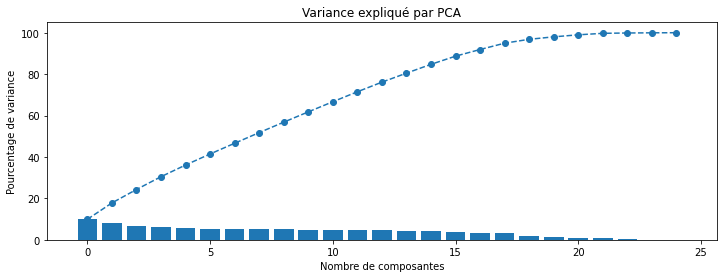

In [ ]:
# Représentation graphique
fig = plt.figure(1, figsize = (12, 4))
plt.bar(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_)
plt.ylim(0, 1.05*100)
plt.plot(range(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.ylabel('Pourcentage de variance')
plt.xlabel('Nombre de composantes')
plt.title('Variance expliqué par PCA')
plt.show()

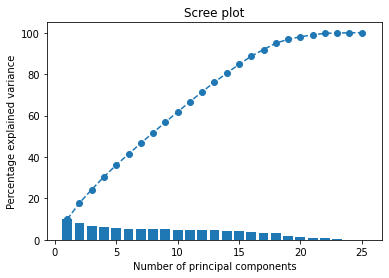

In [ ]:
# Faire un scree plot

def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), marker = 'o', linestyle = '--')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block = False)
    
display_scree_plot(pca)  

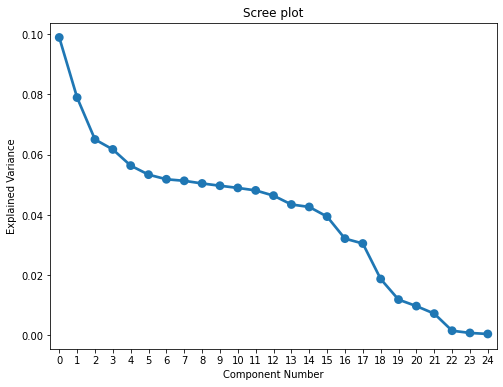

In [ ]:
# Scree plot
# ( = line plot of the eigenvalues of factors or principal components in an analysis)

ind = np.arange(0, df.shape[1])
(fig, ax) = plt.subplots(figsize = (8, 6))
sns.pointplot(x = ind, y = pca.explained_variance_ratio_, marker = 'o', linestyle = '--')
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

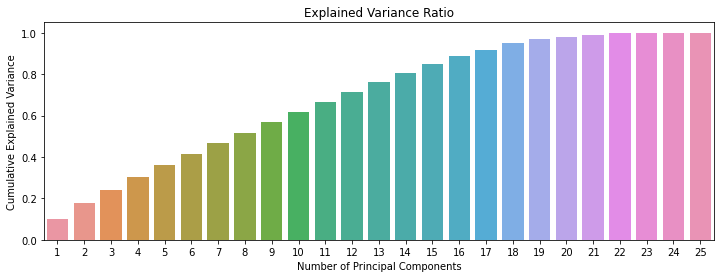

In [ ]:
# autre représentation de la variance expliquée :
plt.figure(figsize = (12, 4))
sns.barplot(x = np.arange(1, len(pca.explained_variance_ratio_) + 1),
            y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.09889108, 0.0789475 , 0.06504299, 0.06173756, 0.05636801,
       0.05336921, 0.05183223, 0.05132498, 0.05044725, 0.04969349,
       0.04896726, 0.04814136, 0.04640581, 0.04346828, 0.04264967,
       0.03945046, 0.03214192, 0.03052104, 0.01875036, 0.01190909,
       0.00975243, 0.00725665, 0.0015837 , 0.00084637, 0.00050129])

In [ ]:
# Test en ne gardant que 2 dimensions :

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df)

In [ ]:
print('Explained variance regarding first dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[0]))
print('Explained variance regarding second dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[1]))
print('Total variance included in those 2 dimensions : ' + '{:.1%}'.format(pca.explained_variance_ratio_.sum()))

Explained variance regarding first dimension : 9.9%
Explained variance regarding second dimension : 7.9%
Total variance included in those 2 dimensions : 17.8%


In [ ]:
# Test en conservant 90% de la variance

pca_90 = PCA(n_components = 0.90)  # 90% de la variance
df_pca_90 = pca_90.fit_transform(df)

# Mise sous forme de DataFrame
df_pca_90 = pd.DataFrame(df_pca_90, columns = ['Composante_' + str(i) for i in range(df_pca_90.shape[1])])
df_pca_90.shape

(88872, 17)

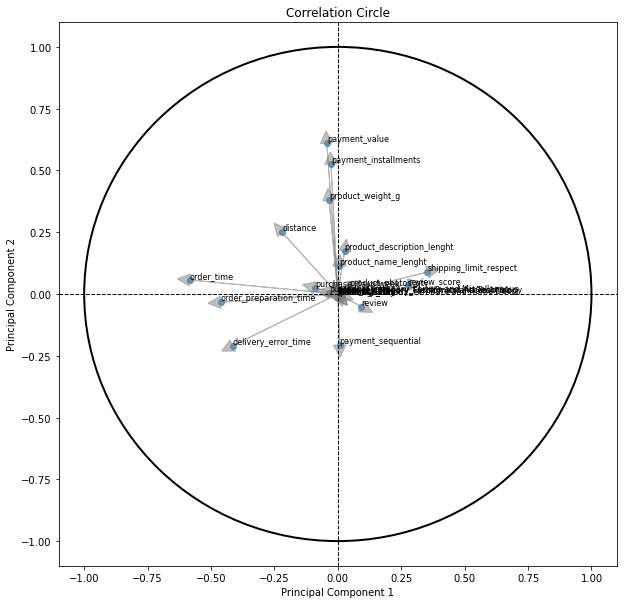

In [ ]:
# Plot the correlation circle

def plot_correlation_circle(pca, features, dimensions = (0, 1), scale_factor = 1):
    num_features = len(features)
    num_principal_components = pca.components_.shape[0]

    if dimensions[0] >= num_principal_components or dimensions[1] >= num_principal_components:
        raise ValueError('Invalid dimensions. Ensure that dimensions are within the range of available principal components.')

    plt.figure(figsize = (10, 10))

    # Scatter plot (avec transparence)
    plt.scatter(pca.components_[dimensions[0], :],
                pca.components_[dimensions[1], :],
                alpha = 0.7)

    # Plot arrows
    for i in range(num_features):
        plt.arrow(0,
                  0,
                  pca.components_[dimensions[0], i],
                  pca.components_[dimensions[1], i],
                  head_width = 0.05,
                  head_length = 0.05,
                  fc = 'grey',
                  ec = 'grey',
                  alpha = 0.5)

        plt.text(pca.components_[dimensions[0], i] * scale_factor,
                 pca.components_[dimensions[1], i] * scale_factor,
                 features[i],
                 ha = 'left',
                 va = 'bottom',
                 fontsize = 8)

    # Add circle patch
    ellipse = Ellipse((0, 0),
                      2,
                      2,
                      edgecolor = 'black',
                      facecolor = 'none',
                      linewidth = 2)
    plt.gca().add_patch(ellipse)

    # Add reference lines
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1)
    plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)

    # Set axis labels
    plt.xlabel(f'Principal Component {dimensions[0] + 1}')
    plt.ylabel(f'Principal Component {dimensions[1] + 1}')

    # Set plot title
    plt.title('Correlation Circle')

# Plot correlation circle using the first two principal components
plot_correlation_circle(pca_90, features = df.columns, dimensions = (0, 1))

plt.show()

In [ ]:
# Cercle des correlations : 

# cercle de rayon 1
# axe horizontal = composante principale 1
# axe vertical = composante principale 2

# longueur des flèches = représente à quel point la variance de la variable est expliquée dans ce plan factoriel
# angle entre les flèches = indication de si les variables sont corrélées entre elles sur ce plan ou non
# etc : petit angle -> correlation positive dans ce plan
# angle de 90° -> pas de correlation
# angle de 180° -> correlation negative

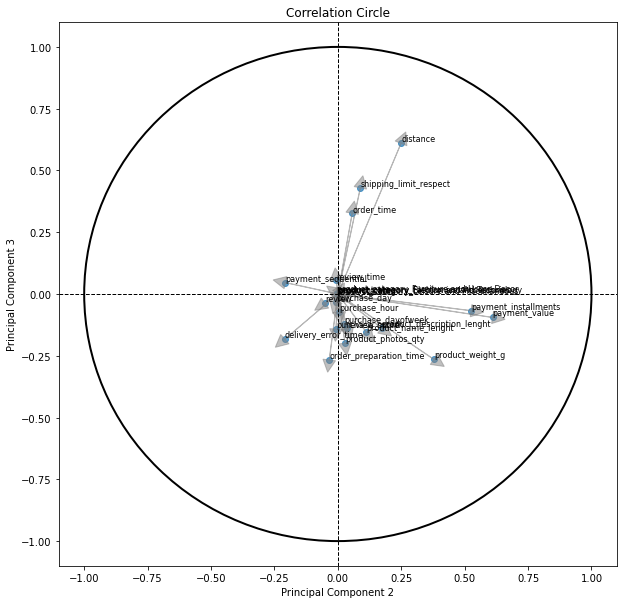

In [ ]:
# autres plans factoriels : 
plot_correlation_circle(pca_90, features = df.columns, dimensions = (1, 2))

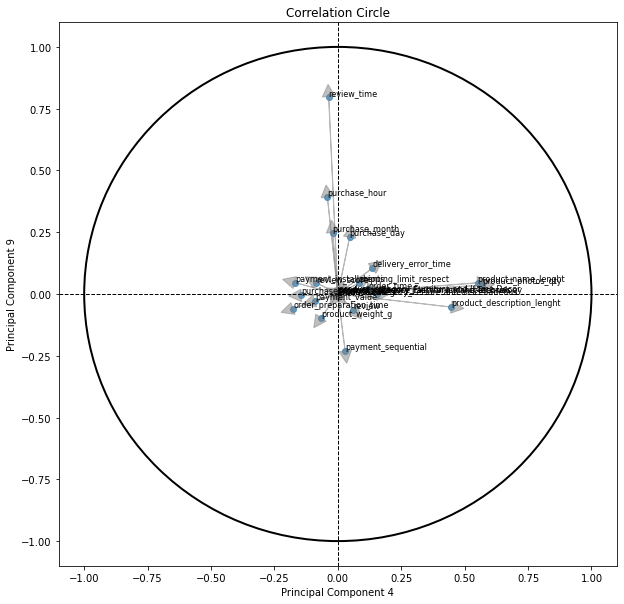

In [ ]:
plot_correlation_circle(pca_90, features = df.columns, dimensions = (3, 8))

In [ ]:
# à tester :
"""
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/

from mlxtend.plotting import plot_pca_correlation_graph

X, y = df_pca

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended

feature_names = [
  'sepal length',
  'sepal width',
  'petal length',
  'petal width']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm,
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

correlation_matrix"""

"\n# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/\n\nfrom mlxtend.plotting import plot_pca_correlation_graph\n\nX, y = df_pca\n\nX_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended\n\nfeature_names = [\n  'sepal length',\n  'sepal width',\n  'petal length',\n  'petal width']\n\nfigure, correlation_matrix = plot_pca_correlation_graph(X_norm,\n                                                        feature_names,\n                                                        dimensions=(1, 2),\n                                                        figure_axis_size=10)\n\ncorrelation_matrix"

In [ ]:
# https://nirpyresearch.com/pca-correlation-circle/
# regarder ça, super interessant

In [ ]:
# étudier les 10 principales composantes

pca = PCA(n_components = 10)
pca.fit(df)
pca.components_

df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 
                                    'Component 2', 
                                    'Component 3', 
                                    'Component 4', 
                                    'Component 5', 
                                    'Component 6', 
                                    'Component 7', 
                                    'Component 8', 
                                    'Component 9', 
                                    'Component 10'])
df_pca_comp

product_name_lenght  product_description_lenght  \
Component 1               0.00451                     0.02661   
Component 2               0.11211                     0.17286   
Component 3              -0.15376                    -0.13868   
Component 4               0.55080                     0.44750   
Component 5              -0.03296                    -0.10501   
Component 6              -0.01029                    -0.01648   
Component 7               0.04142                    -0.16332   
Component 8               0.17038                    -0.15069   
Component 9               0.04549                    -0.05293   
Component 10              0.09688                    -0.02567   

              product_photos_qty  product_weight_g  payment_sequential  \
Component 1              0.04613          -0.03442             0.00722   
Component 2              0.02832           0.37870            -0.20631   
Component 3             -0.19872          -0.26466             0.04606   
Component 4              0.56796          -0.06640             0.02898   
Component 5             -0.17494           0.07250            -0.19189   
Component 6             -0.01488           0.37552             0.40806   
Component 7              0.05616          -0.07860             0.09465   
Component 8             -0.02653           0.04144             0.30992   
Component 9              0.03547          -0.09566            -0.23080   
Component 10            -0.08694           0.16043             0.33519   

              payment_installments  payment_value  review_score  review_time  \
Component 1               -0.02699       -0.04353       0.27771      0.01460   
Component 2                0.52527        0.61002       0.03765     -0.00559   
Component 3               -0.06749       -0.09493      -0.13736      0.05606   
Component 4               -0.16961       -0.09057      -0.08445     -0.03603   
Component 5                0.09588        0.13293      -0.41653     -0.13597   
Component 6               -0.11455        0.01126       0.12582     -0.00440   
Component 7                0.11877       -0.04767       0.11372     -0.35062   
Component 8                0.10113        0.03017      -0.29684     -0.06650   
Component 9                0.04625       -0.02784       0.04551      0.79850   
Component 10               0.01137        0.06080      -0.08194      0.44549   

              order_time  delivery_error_time  order_preparation_time  \
Component 1     -0.58337             -0.41387                -0.46222   
Component 2      0.05676             -0.20883                -0.03381   
Component 3      0.32694             -0.18276                -0.26689   
Component 4      0.11946              0.13484                -0.17670   
Component 5      0.01162              0.39566                -0.22498   
Component 6      0.07207              0.12062                -0.02908   
Component 7      0.03166              0.06548                -0.05144   
Component 8     -0.02452              0.02940                -0.11243   
Component 9      0.01888              0.10343                -0.05874   
Component 10    -0.00077              0.05130                 0.01528   

              shipping_limit_respect  purchase_month  purchase_dayofweek  \
Component 1                  0.35310         0.00605            -0.09092   
Component 2                  0.08877        -0.00724             0.02514   
Component 3                  0.42962        -0.14168            -0.12016   
Component 4                  0.08394        -0.02056            -0.14435   
Component 5                  0.20835        -0.01413            -0.47090   
Component 6                  0.18996        -0.16325            -0.31477   
Component 7                  0.10893         0.77554             0.07607   
Component 8                  0.10324         0.25258             0.14999   
Component 9                  0.04497         0.24865            -0.00591   
Component 10                 0.01450  

In [ ]:
plt.figure(figsize = (22, 15))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9', 'Component 10'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features', fontsize = 14)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# https://medium.com/@ugursavci/step-by-step-customer-segmentation-using-k-means-and-pca-in-python-5733822295b6

## Export du jeu de données final

In [ ]:
# Export données 'propres' au format pickle

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df, f)